In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [2]:
#logging.basicConfig(filename='Jupyter_Notebook_logs.log', level=logging.INFO, format='%(levelname)s:%(asctime)s:%(message)s')

In [3]:
# importing dataset

data = pd.read_csv("loans_train_data.csv")
data_test = pd.read_csv("loans_test_data.csv")
data.head()

emp_title  emp_length state homeownership  annual_income  \
0    instructor         2.0    NY          RENT        45000.0   
1         owner        10.0    CA          RENT        68000.0   
2  merchandiser        10.0    TN           OWN        15000.0   
3  deputy clerk         2.0    OH      MORTGAGE        35000.0   
4       teacher         2.0    UT          RENT        34000.0   

   verified_income  debt_to_income  annual_income_joint  \
0  Source Verified            6.71                  NaN   
1  Source Verified           18.99                  NaN   
2  Source Verified           20.83                  NaN   
3         Verified           35.56                  NaN   
4     Not Verified           13.20                  NaN   

  verification_income_joint  debt_to_income_joint  delinq_2y  \
0                       NaN                   NaN          0   
1                       NaN                   NaN          0   
2                       NaN                   NaN          0   
3                       NaN                   NaN          0   
4                       NaN                   NaN          0   

   months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                       NaN                  2011                   0   
1                       NaN                  1971                   1   
2                       NaN                  2007                   1   
3                      29.0                  2007                   3   
4                       NaN                  2011                   0   

   total_credit_lines  open_credit_lines  total_credit_limit  \
0                   5                  4                9300   
1                  14                  5               44050   
2                   9                  5               19300   
3                  16                  8               76236   
4                   8                  8               20577   

   total_credit_utilized  num_collections_last_12m  \
0                   7743                         0   
1                  34712                         0   
2                   6502                         0   
3                  36051                         1   
4                  18633                         0   

   num_historical_failed_to_pay  months_since_90d_late  \
0                             0                    NaN   
1                             1                    NaN   
2                             0                    NaN   
3                             0                    NaN   
4                             0                    NaN   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                           239   
4                        0                             0   

   current_installment_accounts  accounts_opened_24m  \
0                             0                    0   
1                             2                    3   
2                             0                    1   
3                             3                    1   
4                             6                    3   

   months_since_last_credit_inquiry  num_satisfactory_accounts  \
0                               NaN                          4   
1                               3.0                          5   
2                               1.0                          5   
3                               0.0                          8   
4                              21.0                          8   

   num_accounts_120d_past_due  num_accounts_30d_past_due  \
0                         0.0                          0   
1                         0.0                          0   
2                         0.0                          0   
3                         0.0       

In [4]:
# checking the dimensions of the dataframe

print(data.shape)
print(data_test.shape)

(7000, 46)
(3000, 45)


In [5]:
# Checking missing value in dataset

print(data.isnull().sum())
print()
print(data_test.isnull().sum())


emp_title                            569
emp_length                           557
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        14
annual_income_joint                 5941
verification_income_joint           5966
debt_to_income_joint                5941
delinq_2y                              0
months_since_last_delinq            3940
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               5389
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [6]:
# Checking percentage missing value in dataset

print(100*(data.isnull().sum()/data.shape[0]))
print()
print(100*data_test.isnull().sum()/data_test.shape[0])

emp_title                            8.128571
emp_length                           7.957143
state                                0.000000
homeownership                        0.000000
annual_income                        0.000000
verified_income                      0.000000
debt_to_income                       0.200000
annual_income_joint                 84.871429
verification_income_joint           85.228571
debt_to_income_joint                84.871429
delinq_2y                            0.000000
months_since_last_delinq            56.285714
earliest_credit_line                 0.000000
inquiries_last_12m                   0.000000
total_credit_lines                   0.000000
open_credit_lines                    0.000000
total_credit_limit                   0.000000
total_credit_utilized                0.000000
num_collections_last_12m             0.000000
num_historical_failed_to_pay         0.000000
months_since_90d_late               76.985714
current_accounts_delinq           

In [7]:
# Checking number of unique elements in the columns

data.nunique()


emp_title                           3535
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1100
verified_income                        3
debt_to_income                      3237
annual_income_joint                  470
verification_income_joint              3
debt_to_income_joint                 899
delinq_2y                             11
months_since_last_delinq              95
earliest_credit_line                  53
inquiries_last_12m                    24
total_credit_lines                    78
open_credit_lines                     43
total_credit_limit                  6508
total_credit_utilized               6751
num_collections_last_12m               4
num_historical_failed_to_pay           8
months_since_90d_late                101
current_accounts_delinq                2
total_collection_amount_ever         698
current_installment_accounts          28
accounts_opened_

In [8]:

data_test.nunique()

emp_title                           1747
emp_length                            11
state                                 50
homeownership                          3
annual_income                        623
verified_income                        3
debt_to_income                      2033
annual_income_joint                  243
verification_income_joint              3
debt_to_income_joint                 411
delinq_2y                             10
months_since_last_delinq              85
earliest_credit_line                  48
inquiries_last_12m                    21
total_credit_lines                    71
open_credit_lines                     42
total_credit_limit                  2872
total_credit_utilized               2945
num_collections_last_12m               3
num_historical_failed_to_pay           7
months_since_90d_late                 88
current_accounts_delinq                1
total_collection_amount_ever         329
current_installment_accounts          25
accounts_opened_

In [9]:
# Checking how much memory each column uses in bytes

data.memory_usage()

Index                                 128
emp_title                           56000
emp_length                          56000
state                               56000
homeownership                       56000
annual_income                       56000
verified_income                     56000
debt_to_income                      56000
annual_income_joint                 56000
verification_income_joint           56000
debt_to_income_joint                56000
delinq_2y                           56000
months_since_last_delinq            56000
earliest_credit_line                56000
inquiries_last_12m                  56000
total_credit_lines                  56000
open_credit_lines                   56000
total_credit_limit                  56000
total_credit_utilized               56000
num_collections_last_12m            56000
num_historical_failed_to_pay        56000
months_since_90d_late               56000
current_accounts_delinq             56000
total_collection_amount_ever      

In [10]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         6431 non-null   object 
 1   emp_length                        6443 non-null   float64
 2   state                             7000 non-null   object 
 3   homeownership                     7000 non-null   object 
 4   annual_income                     7000 non-null   float64
 5   verified_income                   7000 non-null   object 
 6   debt_to_income                    6986 non-null   float64
 7   annual_income_joint               1059 non-null   float64
 8   verification_income_joint         1034 non-null   object 
 9   debt_to_income_joint              1059 non-null   float64
 10  delinq_2y                         7000 non-null   int64  
 11  months_since_last_delinq          3060 non-null   float64
 12  earlie

In [11]:
#logging.info('model checks are done')

## Data cleaning
- Dropping columns whose contains missing value more than 50% and ID columns which dont give much information.

In [12]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data.isnull().sum()/data.shape[0])),
                (100*(data.isnull().sum()/data.shape[0])).index):
    if i > 50:
        print(j)

annual_income_joint
verification_income_joint
debt_to_income_joint
months_since_last_delinq
months_since_90d_late


In [13]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data_test.isnull().sum()/data_test.shape[0])),
                (100*(data_test.isnull().sum()/data_test.shape[0])).index):
    if i > 50:
        print(j)

annual_income_joint
verification_income_joint
debt_to_income_joint
months_since_last_delinq
months_since_90d_late


In [14]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data.isnull().sum()/data.shape[0])),
                (100*(data.isnull().sum()/data.shape[0])).index):
    if i > 50:
        data = data.drop(j,axis=1)

In [15]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data_test.isnull().sum()/data_test.shape[0])),
                (100*(data_test.isnull().sum()/data_test.shape[0])).index):
    if i > 50:
        data_test = data_test.drop(j,axis=1)

In [16]:
# Checking data frame 
data.head(10)

emp_title  emp_length state homeownership  annual_income  \
0                instructor         2.0    NY          RENT        45000.0   
1                     owner        10.0    CA          RENT        68000.0   
2              merchandiser        10.0    TN           OWN        15000.0   
3              deputy clerk         2.0    OH      MORTGAGE        35000.0   
4                   teacher         2.0    UT          RENT        34000.0   
5           personal banker         1.0    GA      MORTGAGE        50000.0   
6    manufacturing engineer         5.0    CT          RENT        80500.0   
7  order processing manager         7.0    CA          RENT        85000.0   
8       physician assistant         2.0    NJ      MORTGAGE       210000.0   
9         warehouse manager         2.0    CA           OWN        75000.0   

   verified_income  debt_to_income  delinq_2y  earliest_credit_line  \
0  Source Verified            6.71          0                  2011   
1  Source Verified           18.99          0                  1971   
2  Source Verified           20.83          0                  2007   
3         Verified           35.56          0                  2007   
4     Not Verified           13.20          0                  2011   
5         Verified           17.38          0                  2005   
6     Not Verified           22.63          0                  2005   
7  Source Verified           22.33          0                  2013   
8  Source Verified           22.26          0                  2000   
9     Not Verified           36.96          0                  2003   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   0                   5                  4   
1                   1                  14                  5   
2                   1                   9                  5   
3                   3                  16                  8   
4                   0                   8                  8   
5                   2                  24                 11   
6                   0                  28                 12   
7                   7                  23                 22   
8                   0                  37                 13   
9                   0                  46                 30   

   total_credit_limit  total_credit_utilized  num_collections_last_12m  \
0                9300                   7743                         0   
1               44050                  34712                         0   
2               19300                   6502                         0   
3               76236                  36051                         1   
4               20577                  18633                         0   
5               49557                  25633                         0   
6               83671                  66485                         1   
7              102080                  67427                         0   
8              655360                 657944                         0   
9              180063                  87133                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             1                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
5                             1                        0   
6                             0                        0   
7                             0                        0   
8                             0                        0   
9                             0                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                             0                             0   
1                             0                             2   
2

In [17]:
# Checking shape of data frame 
data.shape

(7000, 41)

In [18]:
# Dropping ID column from dataframe

data = data.drop('id', axis= 1)

# Checking data frame shape

data.shape

(7000, 40)

In [19]:
# Dropping ID column from dataframe

data_test = data_test.drop('id', axis= 1)

# Checking data frame shape

data_test.shape

(3000, 39)

In [20]:
# Checking data frame 

data.head(10)

emp_title  emp_length state homeownership  annual_income  \
0                instructor         2.0    NY          RENT        45000.0   
1                     owner        10.0    CA          RENT        68000.0   
2              merchandiser        10.0    TN           OWN        15000.0   
3              deputy clerk         2.0    OH      MORTGAGE        35000.0   
4                   teacher         2.0    UT          RENT        34000.0   
5           personal banker         1.0    GA      MORTGAGE        50000.0   
6    manufacturing engineer         5.0    CT          RENT        80500.0   
7  order processing manager         7.0    CA          RENT        85000.0   
8       physician assistant         2.0    NJ      MORTGAGE       210000.0   
9         warehouse manager         2.0    CA           OWN        75000.0   

   verified_income  debt_to_income  delinq_2y  earliest_credit_line  \
0  Source Verified            6.71          0                  2011   
1  Source Verified           18.99          0                  1971   
2  Source Verified           20.83          0                  2007   
3         Verified           35.56          0                  2007   
4     Not Verified           13.20          0                  2011   
5         Verified           17.38          0                  2005   
6     Not Verified           22.63          0                  2005   
7  Source Verified           22.33          0                  2013   
8  Source Verified           22.26          0                  2000   
9     Not Verified           36.96          0                  2003   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   0                   5                  4   
1                   1                  14                  5   
2                   1                   9                  5   
3                   3                  16                  8   
4                   0                   8                  8   
5                   2                  24                 11   
6                   0                  28                 12   
7                   7                  23                 22   
8                   0                  37                 13   
9                   0                  46                 30   

   total_credit_limit  total_credit_utilized  num_collections_last_12m  \
0                9300                   7743                         0   
1               44050                  34712                         0   
2               19300                   6502                         0   
3               76236                  36051                         1   
4               20577                  18633                         0   
5               49557                  25633                         0   
6               83671                  66485                         1   
7              102080                  67427                         0   
8              655360                 657944                         0   
9              180063                  87133                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             1                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
5                             1                        0   
6                             0                        0   
7                             0                        0   
8                             0                        0   
9                             0                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                             0                             0   
1                             0                             2   
2

In [21]:
data_test.head(10)

emp_title  emp_length state homeownership  \
0                             vp         2.0    IL      MORTGAGE   
1  irrigation service technician         5.0    NJ          RENT   
2            surgical assistant          2.0    LA      MORTGAGE   
3                            NaN         NaN    NV          RENT   
4                        teacher        10.0    AL          RENT   
5                         teller         5.0    IL          RENT   
6                            NaN         NaN    WY           OWN   
7              financial analyst         3.0    OH          RENT   
8           shipping supervisor         10.0    GA      MORTGAGE   
9                       engineer        10.0    WA      MORTGAGE   

   annual_income  verified_income  debt_to_income  delinq_2y  \
0        75000.0     Not Verified           26.19          0   
1        28000.0  Source Verified           21.86          0   
2        25992.0         Verified            9.25          1   
3        33000.0  Source Verified            3.89          0   
4        47000.0     Not Verified           15.82          0   
5        50000.0     Not Verified           20.74          0   
6        64000.0     Not Verified           25.30          0   
7        70000.0  Source Verified           10.78          0   
8        65000.0     Not Verified           32.81          0   
9       150000.0  Source Verified            8.28          0   

   earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0                  1986                   1                  21   
1                  2004                   1                  10   
2                  1995                   1                   9   
3                  1998                   3                  47   
4                  1996                   0                  18   
5                  2002                   8                  39   
6                  1971                   7                  38   
7                  2006                   1                  29   
8                  2006                   1                  37   
9                  2001                   2                  15   

   open_credit_lines  total_credit_limit  total_credit_utilized  \
0                 11              280228                  62194   
1                  2                2200                   1495   
2                  6               50300                   6968   
3                 23               30100                   3906   
4                  4               27979                  24400   
5                 28              128476                  16061   
6                  9              372713                  38166   
7                 11               45015                  14358   
8                 20              152185                  44564   
9                  7              689564                  37086   

   num_collections_last_12m  num_historical_failed_to_pay  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
5                         0                             0   
6                         0                             0   
7                         0                             0   
8                         0                             0   
9                         0                             0   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
5                        0                             0   
6

## Missing value Treatment

In [22]:
100*(data.isnull().sum()/data.shape[0])

emp_title                            8.128571
emp_length                           7.957143
state                                0.000000
homeownership                        0.000000
annual_income                        0.000000
verified_income                      0.000000
debt_to_income                       0.200000
delinq_2y                            0.000000
earliest_credit_line                 0.000000
inquiries_last_12m                   0.000000
total_credit_lines                   0.000000
open_credit_lines                    0.000000
total_credit_limit                   0.000000
total_credit_utilized                0.000000
num_collections_last_12m             0.000000
num_historical_failed_to_pay         0.000000
current_accounts_delinq              0.000000
total_collection_amount_ever         0.000000
current_installment_accounts         0.000000
accounts_opened_24m                  0.000000
months_since_last_credit_inquiry    12.514286
num_satisfactory_accounts         

In [23]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data.isnull().sum()/data.shape[0])),
                (100*(data.isnull().sum()/data.shape[0])).index):
    if i > 0:
        print(j)

emp_title
emp_length
debt_to_income
months_since_last_credit_inquiry
num_accounts_120d_past_due


In [24]:
# Checking columns with missing value in dataset

for i, j in zip((100*(data_test.isnull().sum()/data_test.shape[0])),
                (100*(data_test.isnull().sum()/data_test.shape[0])).index):
    if i > 0:
        print(j)

emp_title
emp_length
debt_to_income
months_since_last_credit_inquiry
num_accounts_120d_past_due


### Missing value treatment for column- `emp_title`

- Column description: Job title

In [25]:
# Checking value count for column 'emp_title'

data['emp_title'].value_counts(dropna=False)

NaN                                         569
manager                                     151
teacher                                     149
owner                                       142
driver                                       82
registered nurse                             67
sales                                        62
supervisor                                   59
rn                                           57
truck driver                                 46
office manager                               41
president                                    38
project manager                              37
director                                     36
general manager                              35
engineer                                     29
operations manager                           27
machine operator                             23
software engineer                            22
owner                                        22
technician                              

In [26]:
# Checking unique values in the column 'emp_title'

data['emp_title'].nunique()

3535

In [27]:
# Checking levels who occur less than 5 in column 'emp_title'

occ_less_5=[]

for i,j in zip(data['emp_title'].value_counts(dropna=False).index, 
               data['emp_title'].value_counts(dropna=False)):
    if j < 5:
        occ_less_5.append(i)
        
print(len(occ_less_5))

3374


In [28]:
# Changing sublevel of emp_title whose occurance is only once to occurs_1

data['emp_title'] = data['emp_title'].replace(occ_less_5, 'other')

In [29]:
# Changing sublevel of emp_title whose occurance is only once to occurs_1

data_test['emp_title'] = data_test['emp_title'].replace(occ_less_5, 'other')

In [30]:
# Checking value count for column 'emp_title'

data['emp_title'].value_counts(dropna=False)

other                        4045
NaN                           569
manager                       151
teacher                       149
owner                         142
driver                         82
registered nurse               67
sales                          62
supervisor                     59
rn                             57
truck driver                   46
office manager                 41
president                      38
project manager                37
director                       36
general manager                35
engineer                       29
operations manager             27
machine operator               23
software engineer              22
owner                          22
accountant                     21
technician                     21
attorney                       20
vice president                 19
nurse                          19
analyst                        18
foreman                        18
manager                        18
consultant    

In [31]:
# Replacing missing values to 'others' in column 'emp_title'

data['emp_title'] = data['emp_title'].replace(np.nan, 'others')

In [32]:
# Replacing missing values to 'others' in column 'emp_title'

data_test['emp_title'] = data_test['emp_title'].replace(np.nan, 'others')

In [33]:
# Checking value count for column 'emp_title'

data['emp_title'].value_counts(dropna=False)

other                        4045
others                        569
manager                       151
teacher                       149
owner                         142
driver                         82
registered nurse               67
sales                          62
supervisor                     59
rn                             57
truck driver                   46
office manager                 41
president                      38
project manager                37
director                       36
general manager                35
engineer                       29
operations manager             27
machine operator               23
software engineer              22
owner                          22
accountant                     21
technician                     21
attorney                       20
vice president                 19
nurse                          19
analyst                        18
foreman                        18
manager                        18
consultant    

In [34]:
# Checking value count for column 'emp_title'

100*(data['emp_title'].value_counts()/data.shape[0])

other                        57.785714
others                        8.128571
manager                       2.157143
teacher                       2.128571
owner                         2.028571
driver                        1.171429
registered nurse              0.957143
sales                         0.885714
supervisor                    0.842857
rn                            0.814286
truck driver                  0.657143
office manager                0.585714
president                     0.542857
project manager               0.528571
director                      0.514286
general manager               0.500000
engineer                      0.414286
operations manager            0.385714
machine operator              0.328571
software engineer             0.314286
owner                         0.314286
accountant                    0.300000
technician                    0.300000
attorney                      0.285714
vice president                0.271429
nurse                    

### Inferences:

- Here column contains values which occurs less than 5 which constitutes 57.78% and with missing values of 8%.
- Total information of column is described by these two level is 65.78%
- Hence, dropping column `emp_title`

In [35]:
data = data.drop('emp_title', axis=1)

In [36]:
data_test = data_test.drop('emp_title', axis=1)

### Missing value treatment for column- `emp_length`

- Column Description: Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10.


In [37]:
# Checking value count for column 'emp_length'

data['emp_length'].value_counts(dropna=False)

10.0    2366
2.0      683
3.0      594
NaN      557
0.0      491
1.0      486
5.0      434
4.0      424
6.0      285
7.0      254
8.0      216
9.0      210
Name: emp_length, dtype: int64

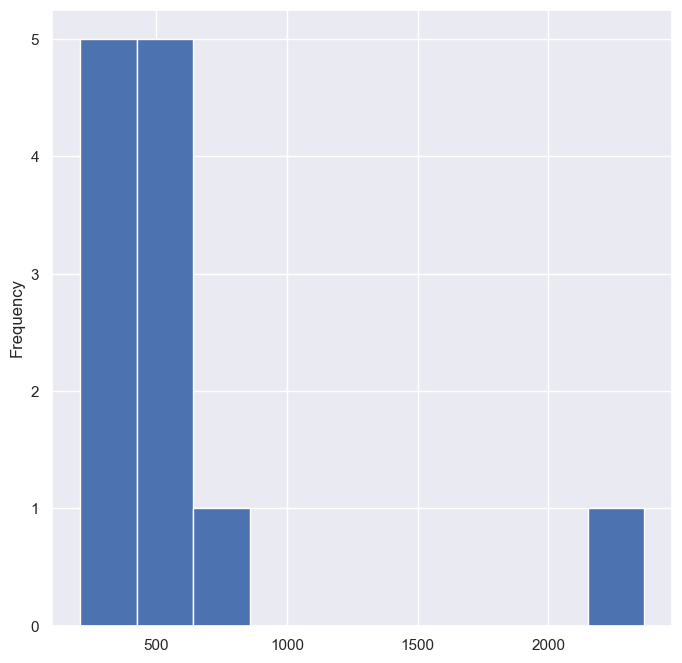

In [38]:
# Plotting value counts of column 'emp_length'

plt.figure(figsize = (8,8))
data['emp_length'].value_counts(dropna=False).plot(kind= 'hist')
plt.show()

### Inferences:

- For this column values seems categorical values, but they denotes the numerical type of data from column description.
- Here if we impute values using median it will change the distribution of values, hence choosing binning the column and addition of missing value as sublevel.

In [39]:
min_value = data['emp_length'].min()
max_value = data['emp_length'].max()
print(min_value)
print(max_value)

0.0
10.0


In [40]:

bins = np.linspace(min_value,max_value,4)
bins

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

In [41]:
labels = ['juior', 'mid-senior', 'senior']

In [42]:
data['emp_length'] = pd.cut(data['emp_length'], bins=bins, labels=labels, include_lowest=True)
data_test['emp_length'] = pd.cut(data_test['emp_length'], bins=bins, labels=labels, include_lowest=True)

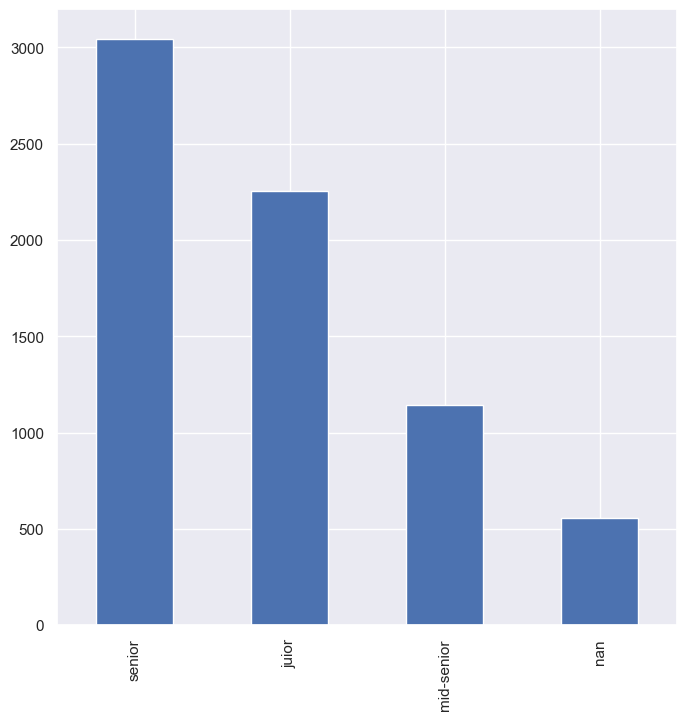

In [43]:
# Plotting value counts of column 'emp_length'

plt.figure(figsize = (8,8))
data['emp_length'].value_counts(dropna=False).plot(kind= 'bar')
plt.show()

In [44]:
data['emp_length'] = data['emp_length'].astype('object')
data['emp_length'] = data['emp_length'].replace(np.nan, 'missing')

data_test['emp_length'] = data_test['emp_length'].astype('object')
data_test['emp_length'] = data_test['emp_length'].replace(np.nan, 'missing')

In [45]:
# Checking missing values in column 'emp_length'

data['emp_length'].isnull().sum()

0

In [46]:
data.head()

emp_length state homeownership  annual_income  verified_income  \
0      juior    NY          RENT        45000.0  Source Verified   
1     senior    CA          RENT        68000.0  Source Verified   
2     senior    TN           OWN        15000.0  Source Verified   
3      juior    OH      MORTGAGE        35000.0         Verified   
4      juior    UT          RENT        34000.0     Not Verified   

   debt_to_income  delinq_2y  earliest_credit_line  inquiries_last_12m  \
0            6.71          0                  2011                   0   
1           18.99          0                  1971                   1   
2           20.83          0                  2007                   1   
3           35.56          0                  2007                   3   
4           13.20          0                  2011                   0   

   total_credit_lines  open_credit_lines  total_credit_limit  \
0                   5                  4                9300   
1                  14                  5               44050   
2                   9                  5               19300   
3                  16                  8               76236   
4                   8                  8               20577   

   total_credit_utilized  num_collections_last_12m  \
0                   7743                         0   
1                  34712                         0   
2                   6502                         0   
3                  36051                         1   
4                  18633                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             1                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                             0                             0   
1                             0                             2   
2                             0                             0   
3                           239                             3   
4                             0                             6   

   accounts_opened_24m  months_since_last_credit_inquiry  \
0                    0                               NaN   
1                    3                               3.0   
2                    1                               1.0   
3                    1                               0.0   
4                    3                              21.0   

   num_satisfactory_accounts  num_accounts_120d_past_due  \
0                          4                         0.0   
1                          5                         0.0   
2                          5                         0.0   
3                          8                         0.0   
4                          8                         0.0   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          3               7600   
1                          0                          2              16000   
2                          0                          4              19300   
3                          0                          2               8000   
4                          0                          1               1000   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                      5                     4                        4   
1                     10                     3                        2   
2                      7                     5                        4   
3                      6                     4                        3   
4                      2                     2                        2   

   num_mort_accounts  account_never_delinq_p

In [47]:
#logging.info('Missing value Treatment for column emp_length is done')

### Missing value treatment for column- `debt_to_income`

- Column Description: Debt-to-income ratio

In [48]:
# Checking value count for column debt_to_income

data['debt_to_income'].value_counts(dropna= False)

0.00      19
NaN       14
16.11      9
19.42      9
20.66      9
11.50      8
15.23      8
18.36      8
14.40      8
12.13      8
15.84      8
14.08      7
23.52      7
15.48      7
13.14      7
10.87      7
17.08      7
17.83      7
5.81       7
13.20      7
20.25      7
21.48      7
17.35      7
19.44      7
20.48      7
11.96      7
13.68      7
21.60      7
12.91      7
18.57      7
15.95      7
14.60      7
18.92      7
16.77      6
11.30      6
13.71      6
19.36      6
16.17      6
20.45      6
17.28      6
13.89      6
15.92      6
10.29      6
13.08      6
14.37      6
18.24      6
7.02       6
25.14      6
8.83       6
17.18      6
17.52      6
19.26      6
11.21      6
21.28      6
8.24       6
19.97      6
16.13      6
14.31      6
29.67      6
9.71       6
15.50      6
20.19      6
20.82      6
16.50      6
20.55      6
14.20      6
10.94      6
24.99      6
16.79      6
10.91      6
21.05      6
12.04      6
11.07      6
11.63      6
19.71      6
10.67      6
22.26      6

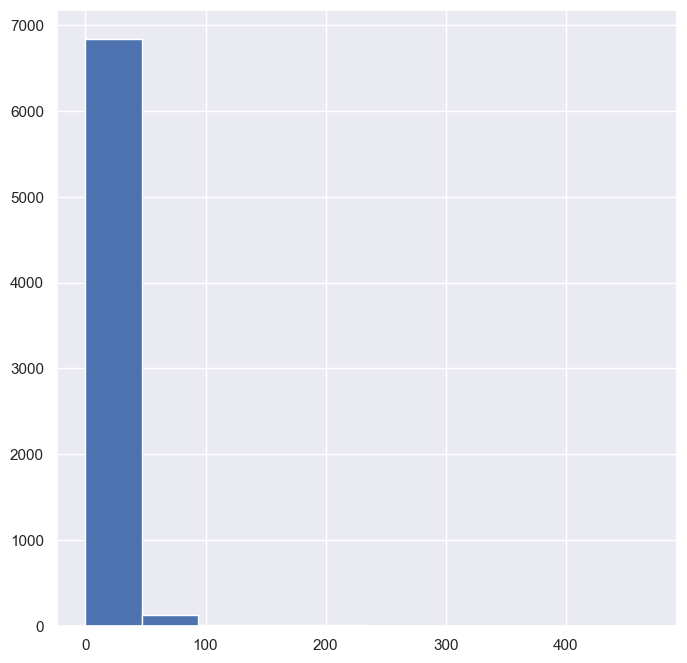

In [49]:
# Plotting histogram to check value distribution
plt.figure(figsize = (8,8))
plt.hist(data['debt_to_income'])
plt.show()

In [50]:
# Checking missing values in column 'debt_to_income'

data['debt_to_income'].isnull().sum()

14

In [51]:
# Replacing missing values from the column to median value of column as data is skewed

debt_to_income_med = data['debt_to_income'].median()

data['debt_to_income'] = data['debt_to_income'].replace(np.nan, debt_to_income_med)

In [52]:
# Replacing missing values from the column to median value of column as data is skewed

debt_to_income_med = data_test['debt_to_income'].median()

data_test['debt_to_income'] = data_test['debt_to_income'].replace(np.nan, debt_to_income_med)

In [53]:
# Checking missing values in column 'debt_to_income'

data['debt_to_income'].isnull().sum()

0

In [54]:
#logging.info('Missing value Treatment for column debt_to_income is done')

### Missing value treatment for column- `months_since_last_credit_inquiry`

- Column Description: Number of months since the last credit inquiry on this applicant.

In [55]:
# Checking value count for column months_since_last_credit_inquiry

data['months_since_last_credit_inquiry'].value_counts(dropna= False)

NaN     876
1.0     567
2.0     502
0.0     459
3.0     459
4.0     449
6.0     415
5.0     398
7.0     356
8.0     326
10.0    265
9.0     265
11.0    196
13.0    187
12.0    175
14.0    169
15.0    158
17.0    130
16.0    127
18.0    116
19.0    100
20.0     75
21.0     74
22.0     74
23.0     54
24.0     28
Name: months_since_last_credit_inquiry, dtype: int64

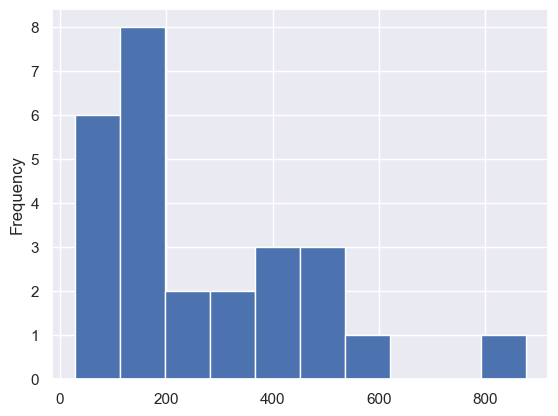

In [56]:
data['months_since_last_credit_inquiry'].value_counts(dropna= False).plot(kind='hist')
plt.show()

In [57]:
# Replacing missing value using median of column 'months_since_last_credit_inquiry'

min_value_mon = data['months_since_last_credit_inquiry'].min()
max_value_mon = data['months_since_last_credit_inquiry'].max()
print(min_value_mon)
print(max_value_mon)

0.0
24.0


In [58]:
bins = np.linspace(min_value_mon,max_value_mon,4)
bins

array([ 0.,  8., 16., 24.])

In [59]:
labels = ['0-8', '9-16', '17-24']

In [60]:
data['months_since_last_credit_inquiry'] = pd.cut(data['months_since_last_credit_inquiry'], bins=bins, labels=labels, include_lowest=True)

data_test['months_since_last_credit_inquiry'] = pd.cut(data_test['months_since_last_credit_inquiry'], bins=bins, labels=labels, include_lowest=True)

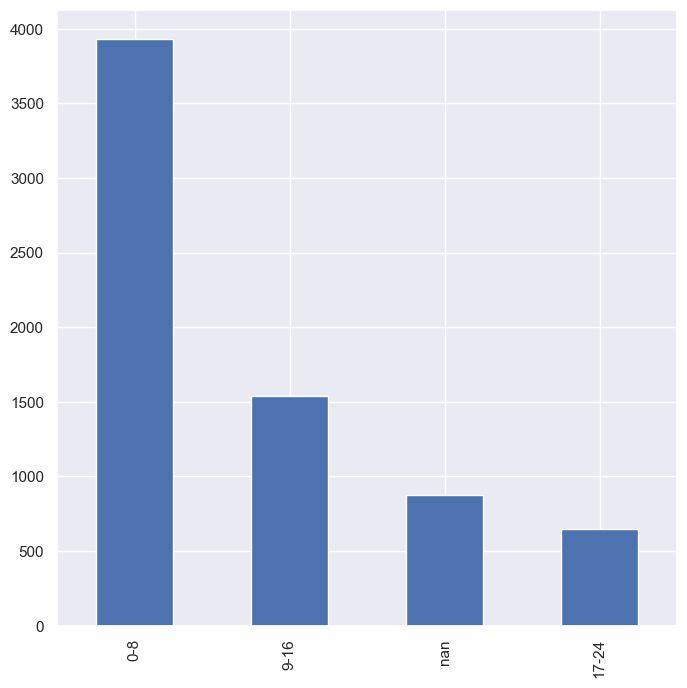

In [61]:
# Plotting value counts of column 'emp_length'

plt.figure(figsize = (8,8))
data['months_since_last_credit_inquiry'].value_counts(dropna=False).plot(kind= 'bar')
plt.show()

In [62]:
data['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].astype('object')
data['months_since_last_credit_inquiry'] = data['months_since_last_credit_inquiry'].replace(np.nan, 'missing')

data_test['months_since_last_credit_inquiry'] = data_test['months_since_last_credit_inquiry'].astype('object')
data_test['months_since_last_credit_inquiry'] = data_test['months_since_last_credit_inquiry'].replace(np.nan, 'missing')

In [63]:
# Checking missing values in column 'emp_length'

data['months_since_last_credit_inquiry'].isnull().sum()

0

In [64]:
#logging.info('Missing value Treatment for column months_since_last_credit_inquiry is done')

### Missing value treatment for column- num_accounts_120d_past_due 

In [65]:
data['num_accounts_120d_past_due'].value_counts(dropna=False)

0.0    6783
NaN     217
Name: num_accounts_120d_past_due, dtype: int64

In [66]:
100*(data['num_accounts_120d_past_due'].value_counts(dropna=False)/data.shape[0])

0.0    96.9
NaN     3.1
Name: num_accounts_120d_past_due, dtype: float64

### Inferences:

- Here, 96.9% values are explained by 0.0 value hence dropping column - num_accounts_120d_past_due

In [67]:
data = data.drop('num_accounts_120d_past_due', axis= 1)

data_test = data_test.drop('num_accounts_120d_past_due', axis= 1)

In [68]:
data = data.drop('state', axis= 1)

data_test = data_test.drop('state', axis= 1)

### Data Visualization

- Univariate analysis

In [69]:
# Checking dtypes of columns and their count

data_nums = data.select_dtypes(exclude='object')

# checking count of numerical columns

print(f'Numeric columns in dataframe: {len(data_nums.columns)}')
print()

# Checking numerical column name 
print(data_nums.columns)

Numeric columns in dataframe: 29

Index(['annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate'],
      dtype='object')


In [70]:
# Checking dtypes of columns and their count

data_cate = data.select_dtypes(include='object')

# checking count of categorical columns

print(f'Categorical columns in dataframe: {len(data_cate.columns)}')
print()

# Checking numerical column name 
print(data_cate.columns)

Categorical columns in dataframe: 8

Index(['emp_length', 'homeownership', 'verified_income',
       'months_since_last_credit_inquiry', 'loan_purpose', 'application_type',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')


<Figure size 1500x600 with 0 Axes>

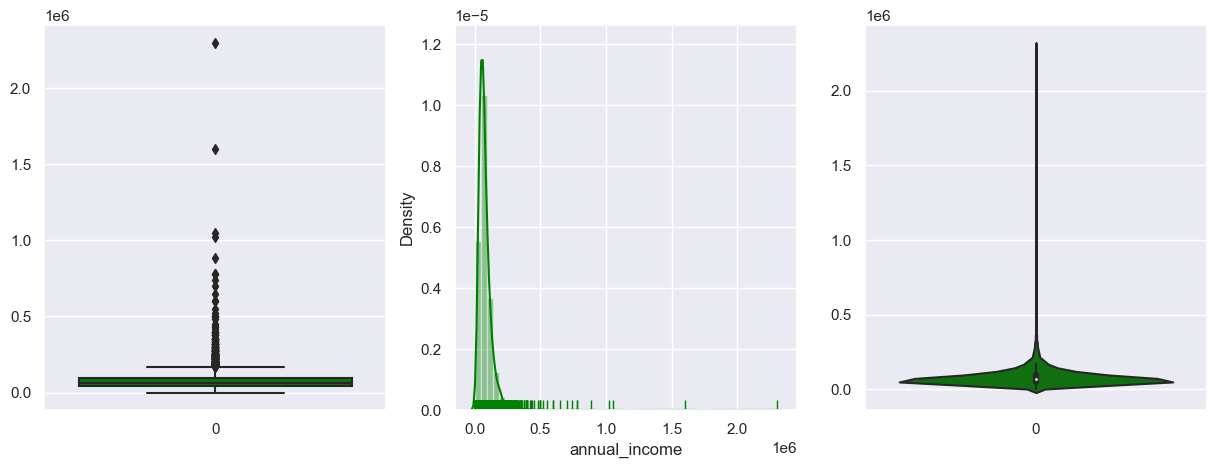

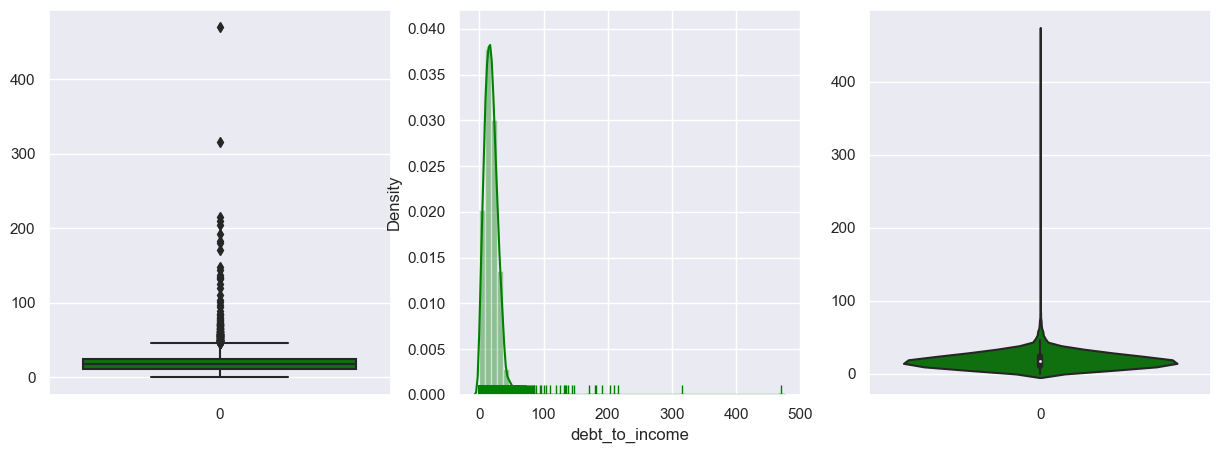

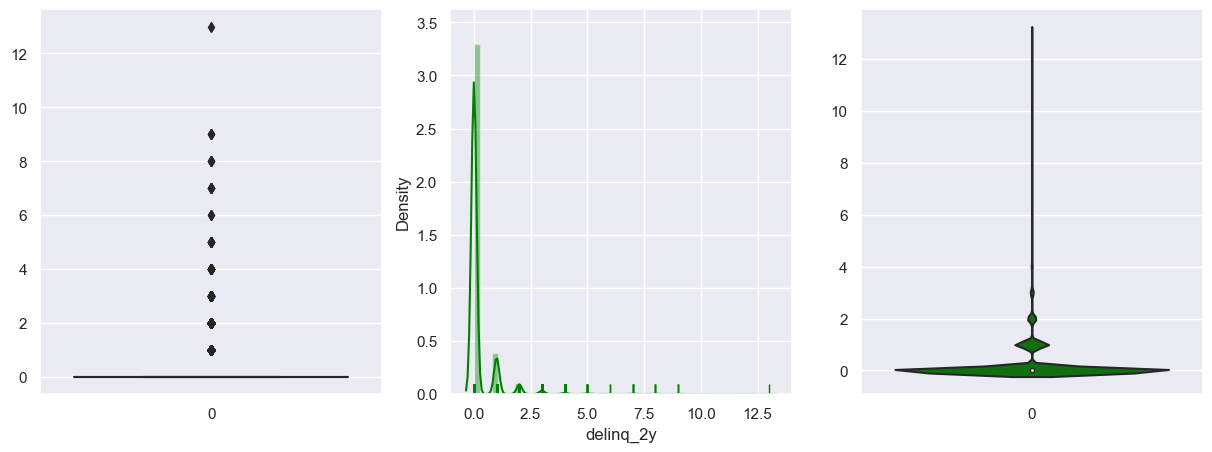

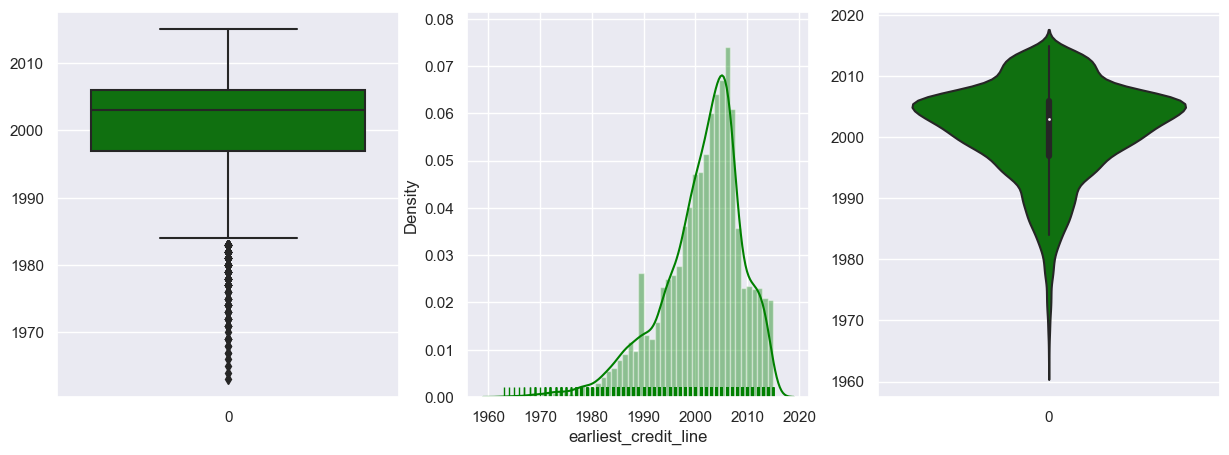

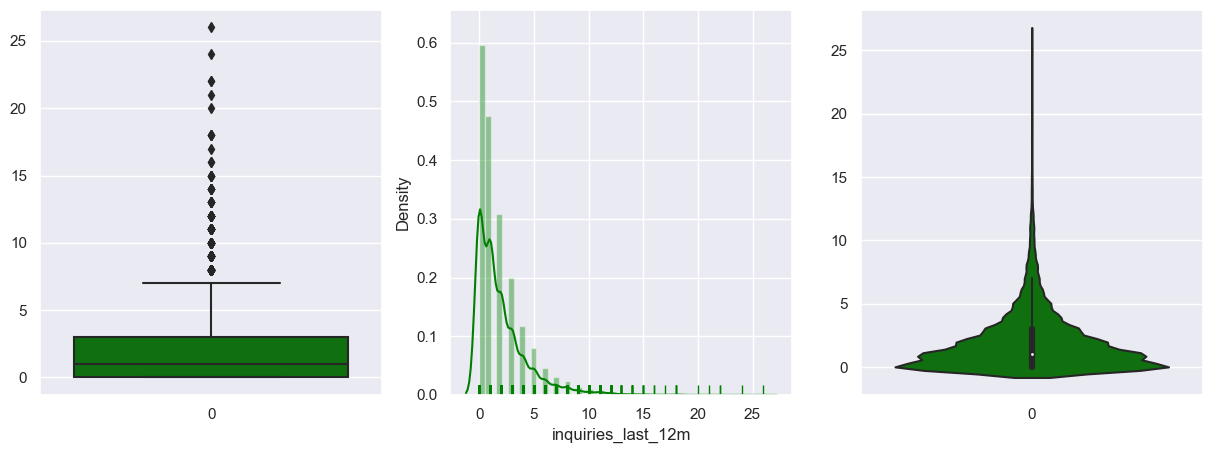

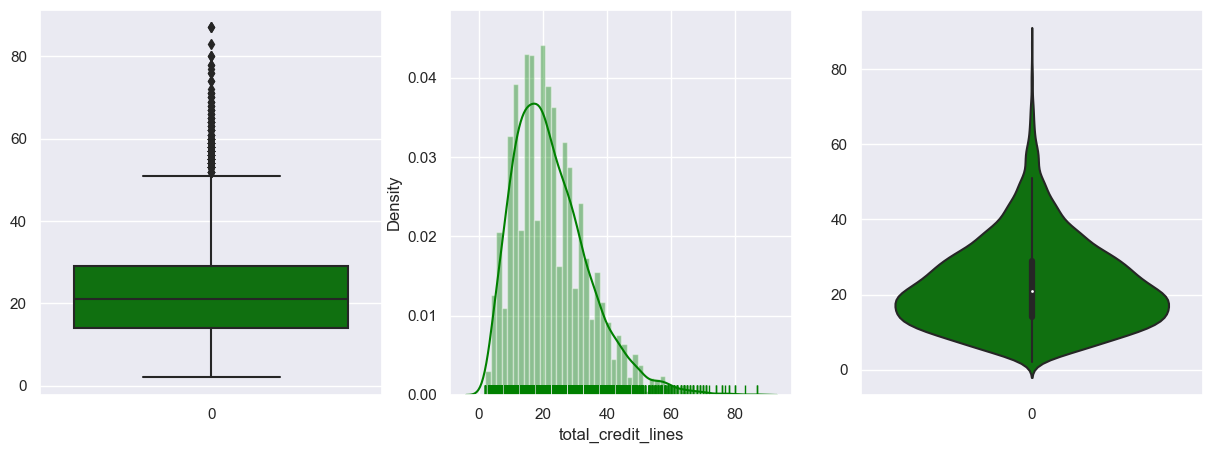

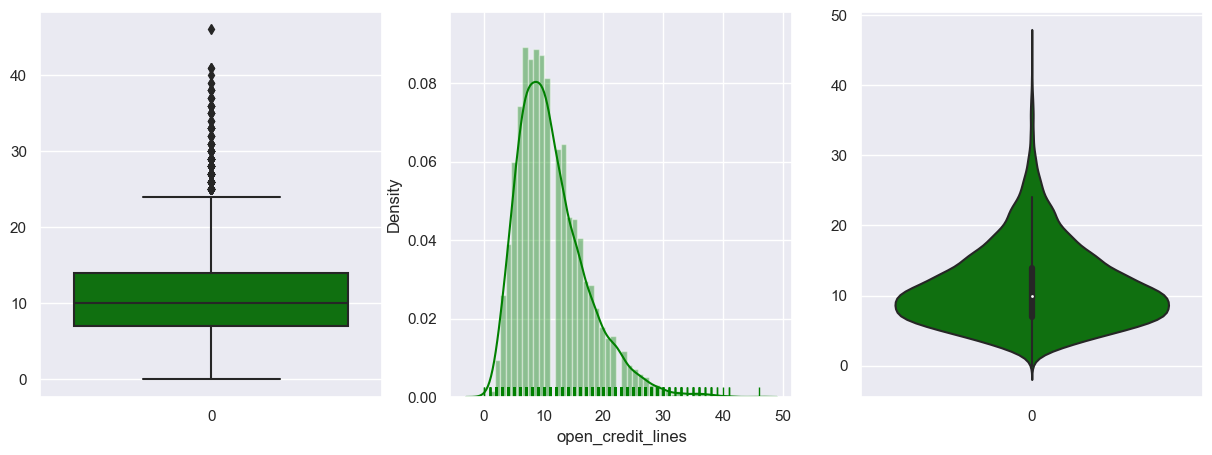

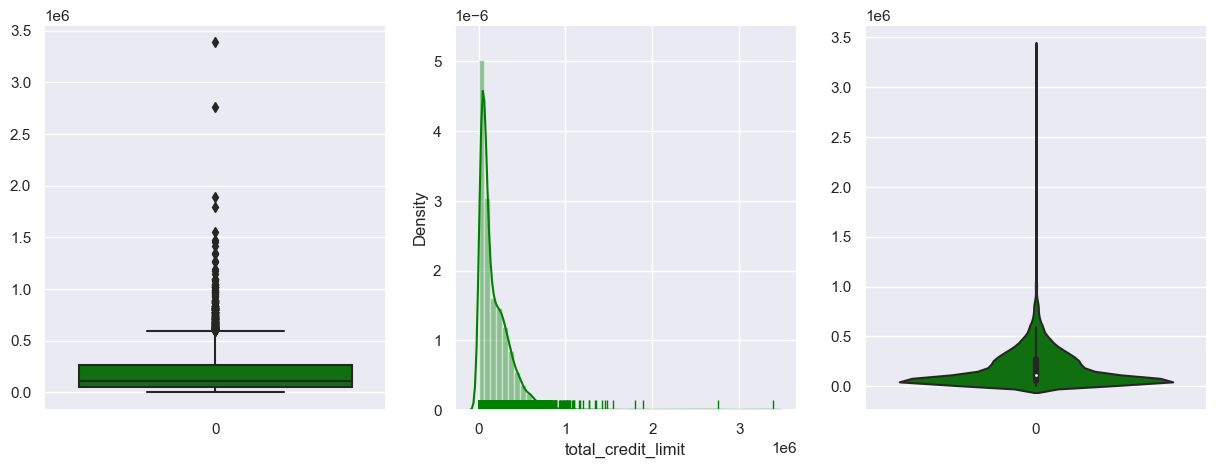

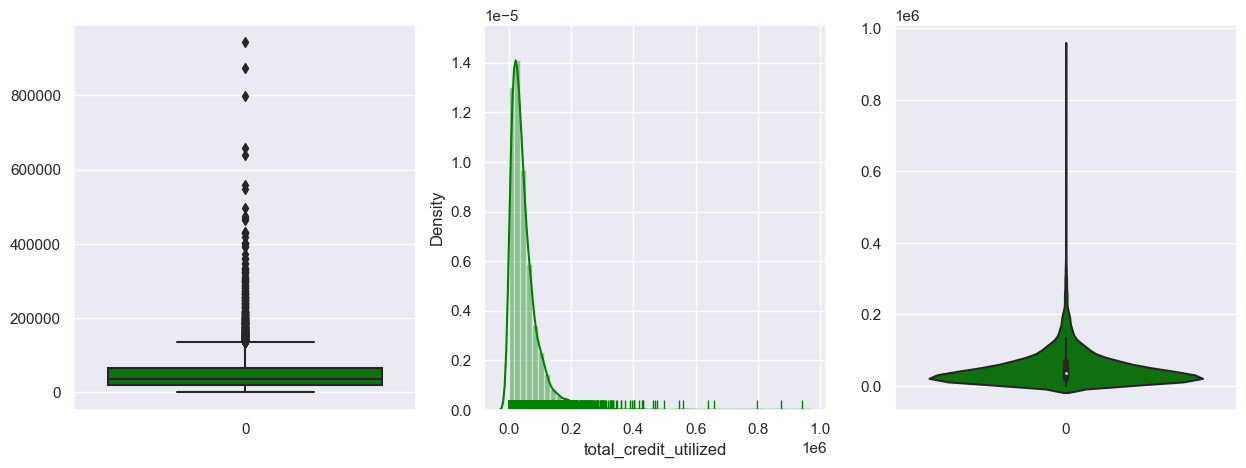

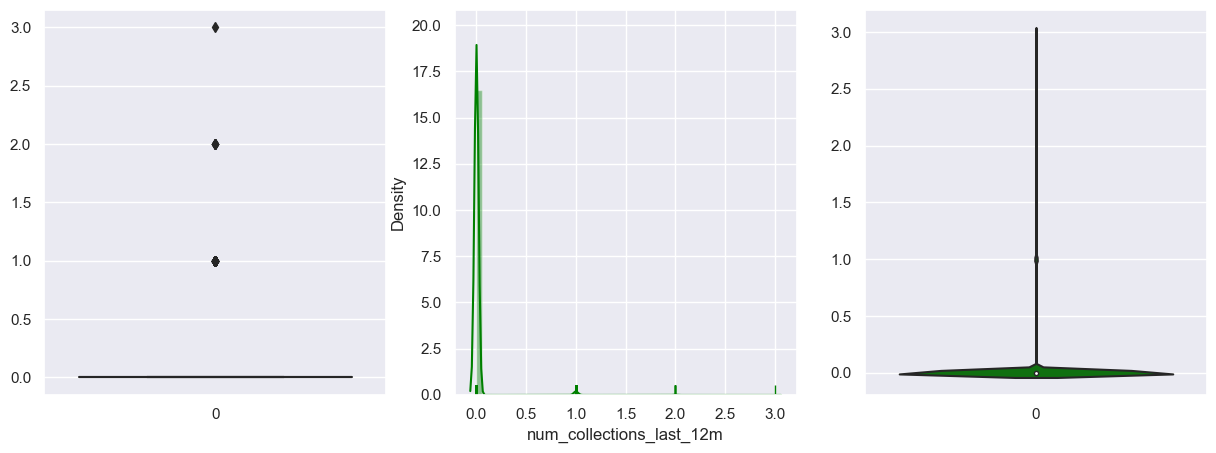

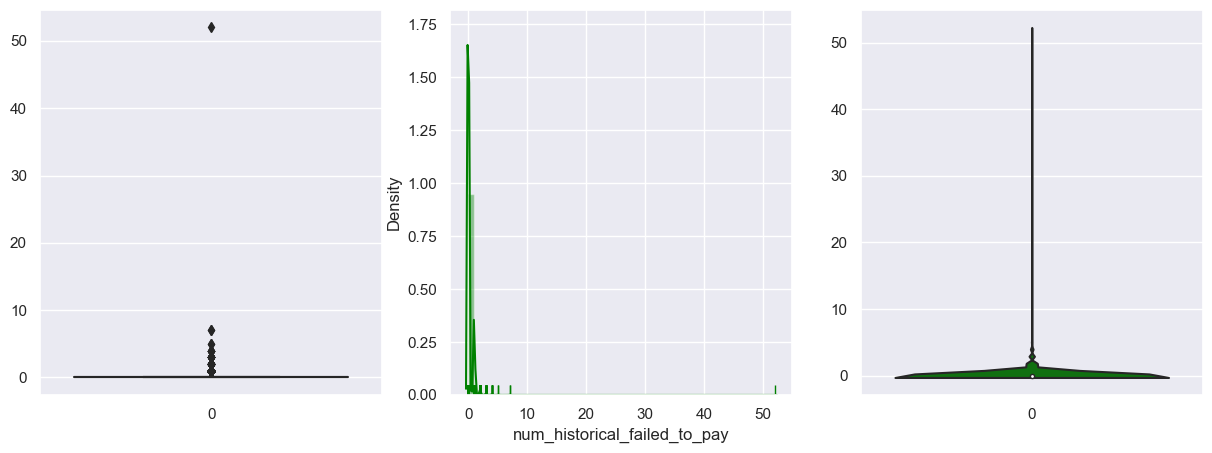

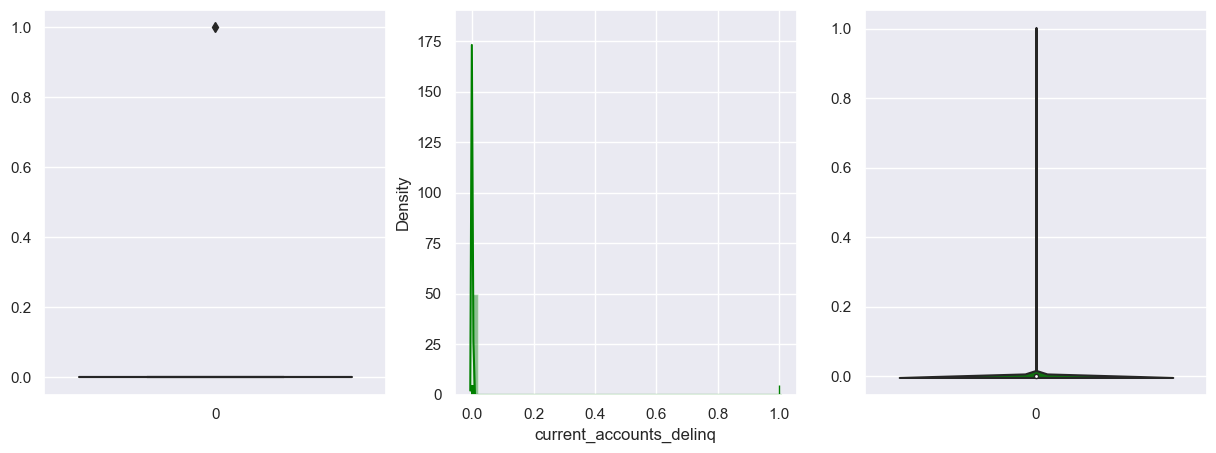

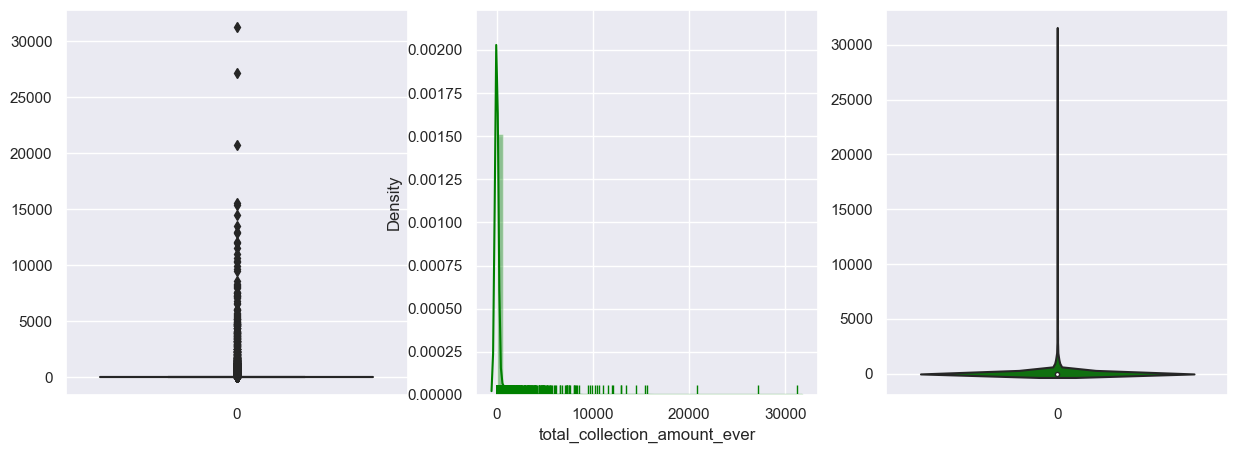

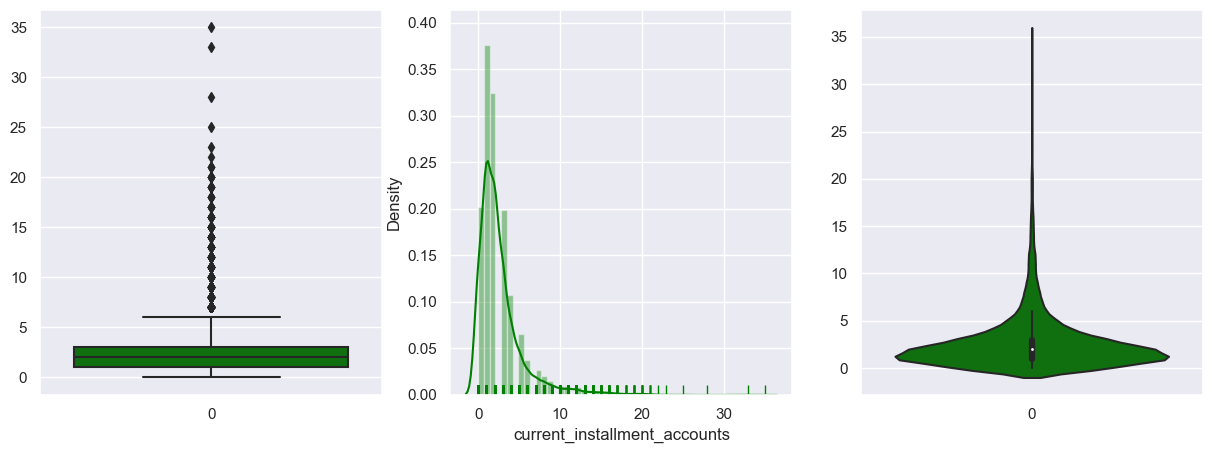

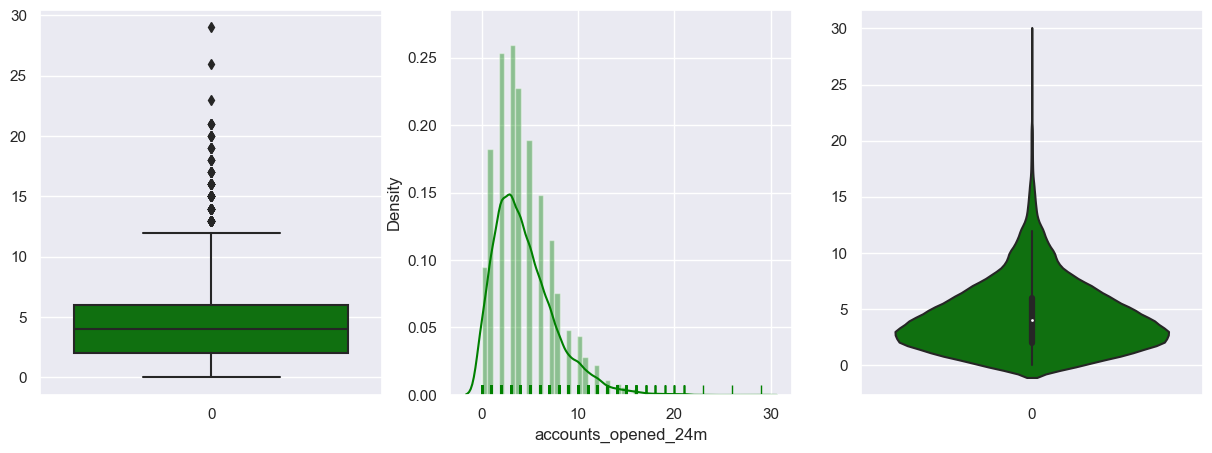

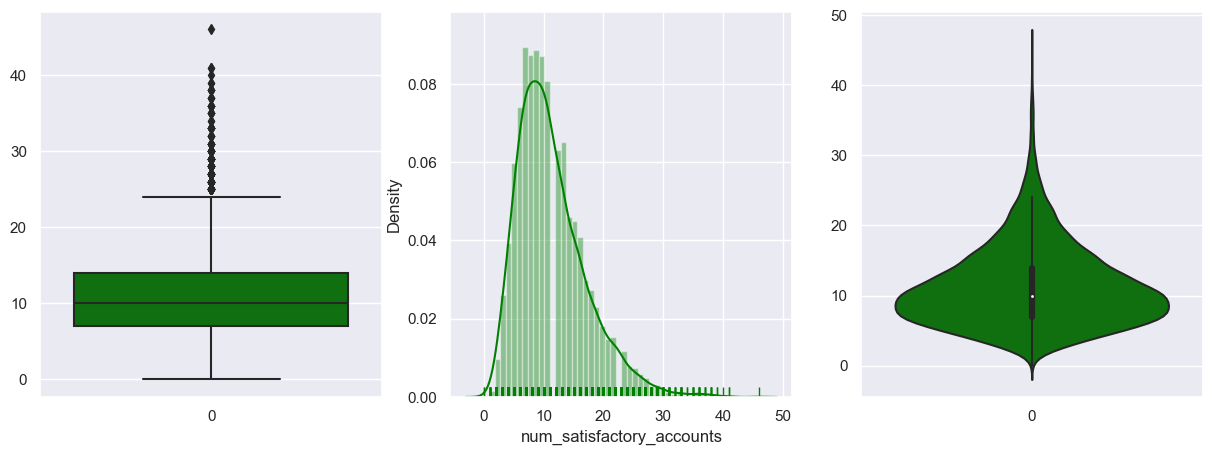

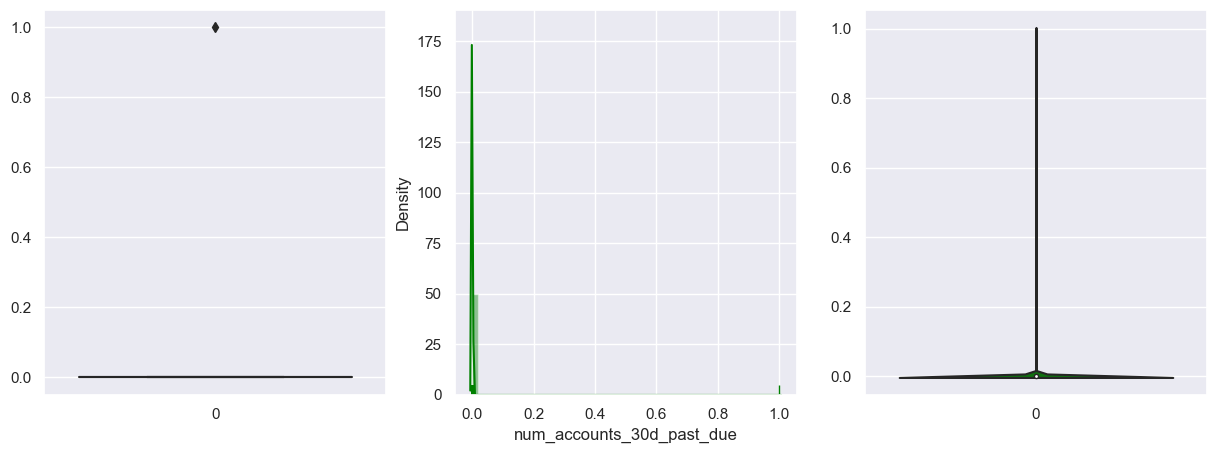

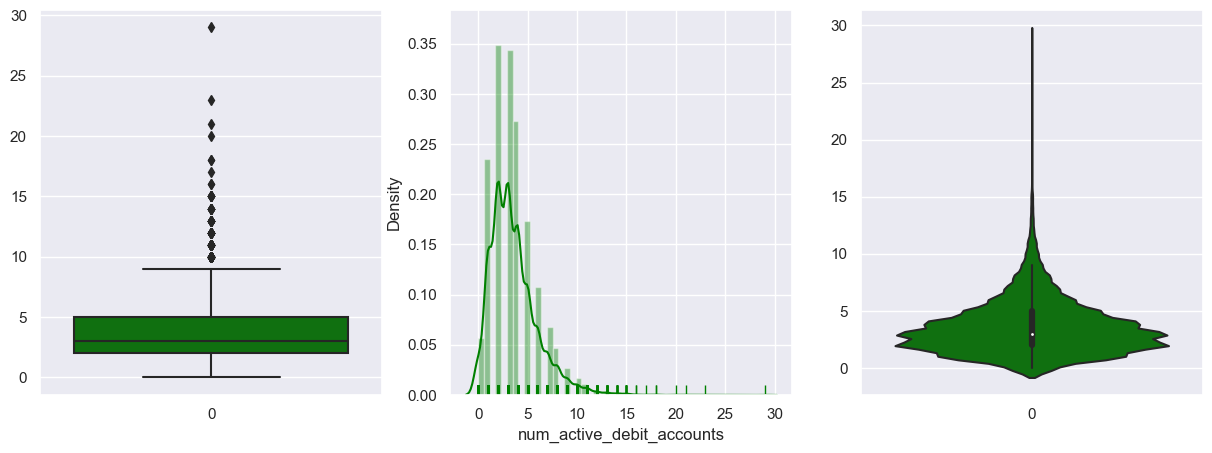

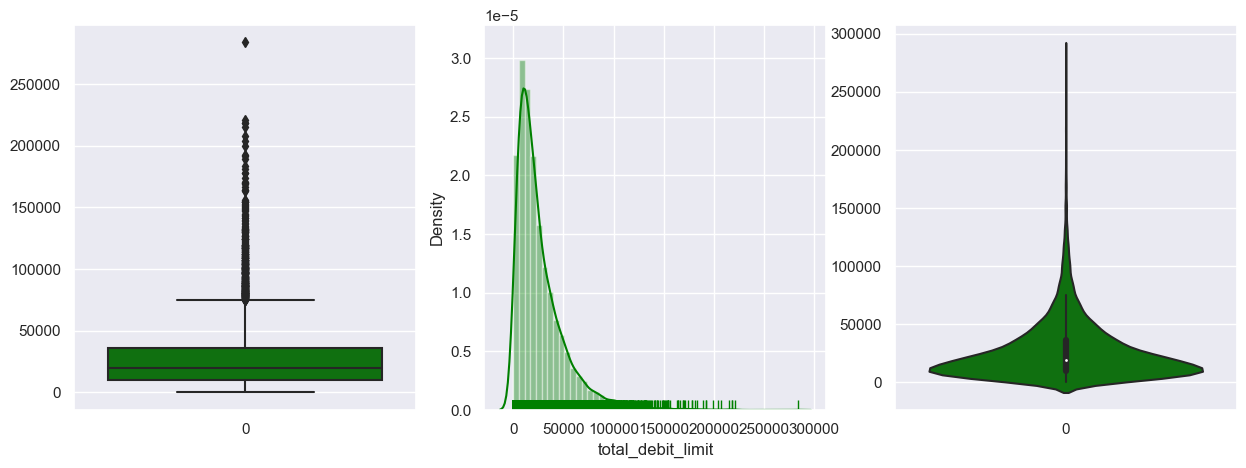

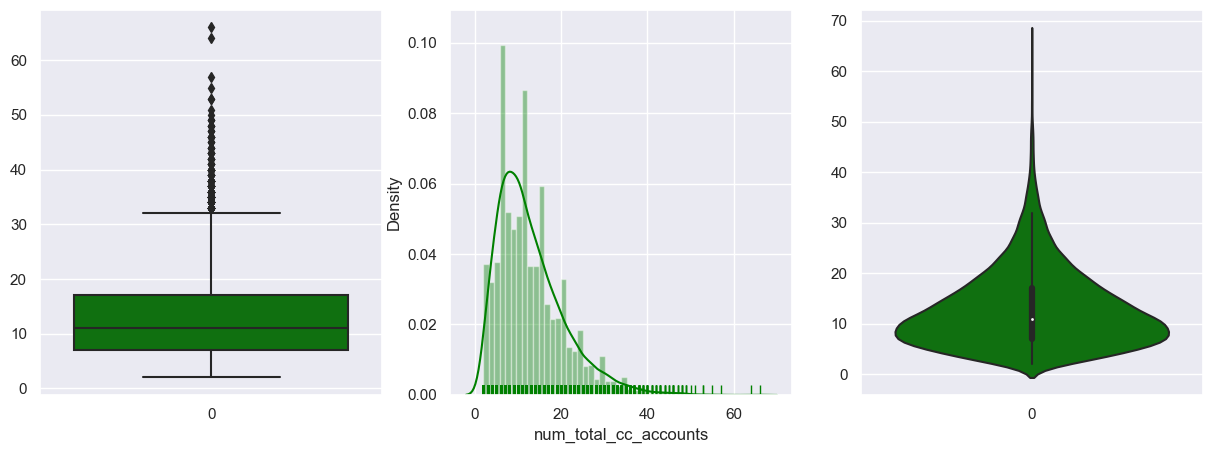

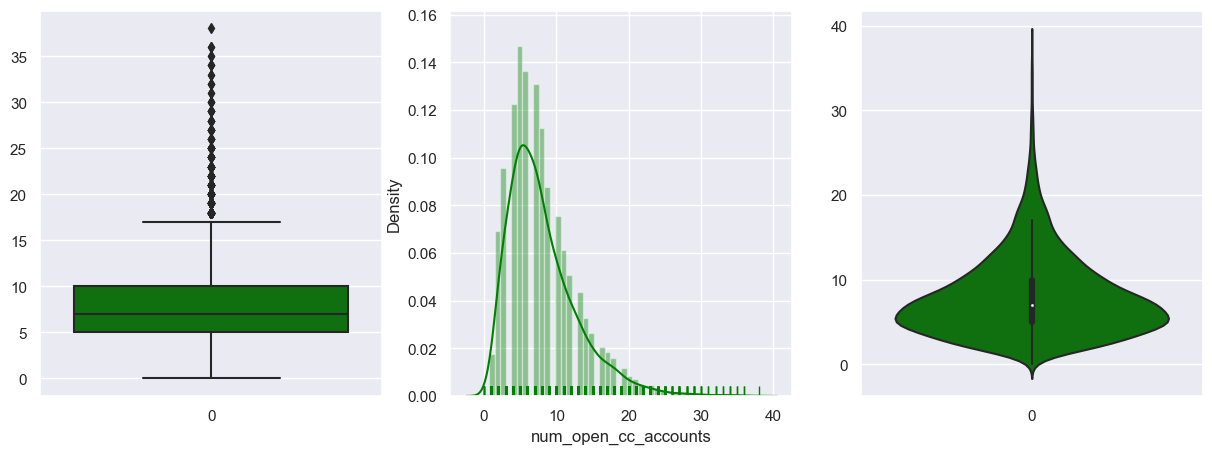

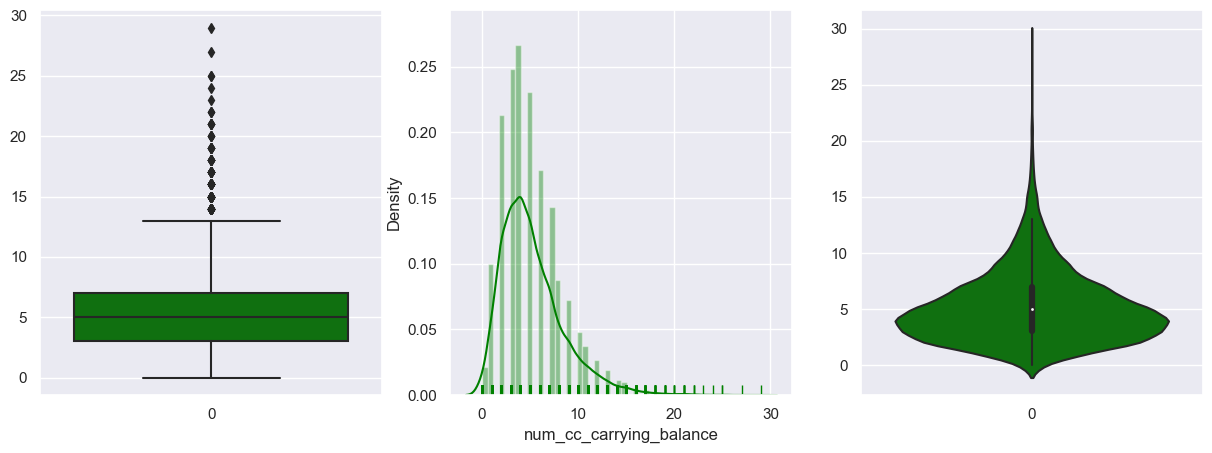

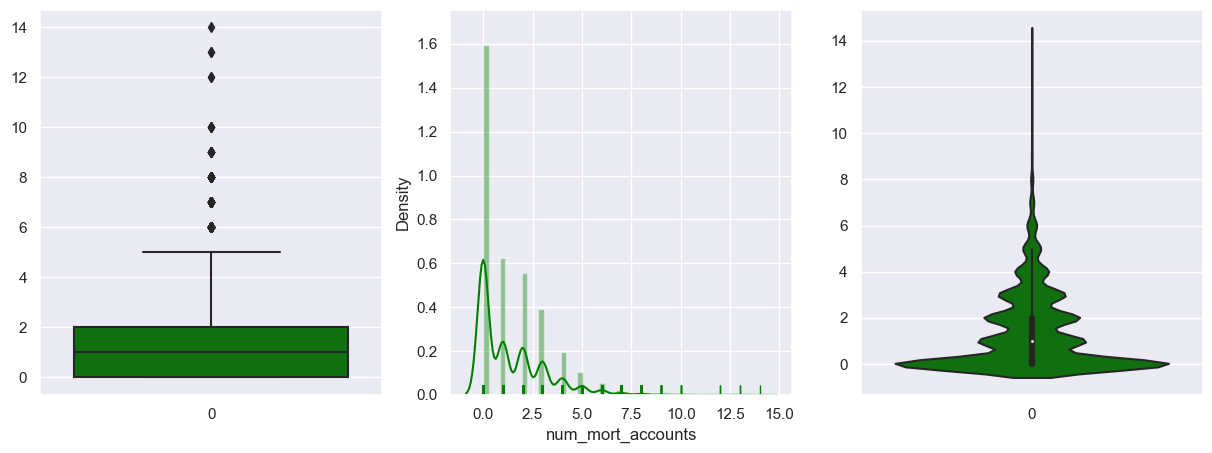

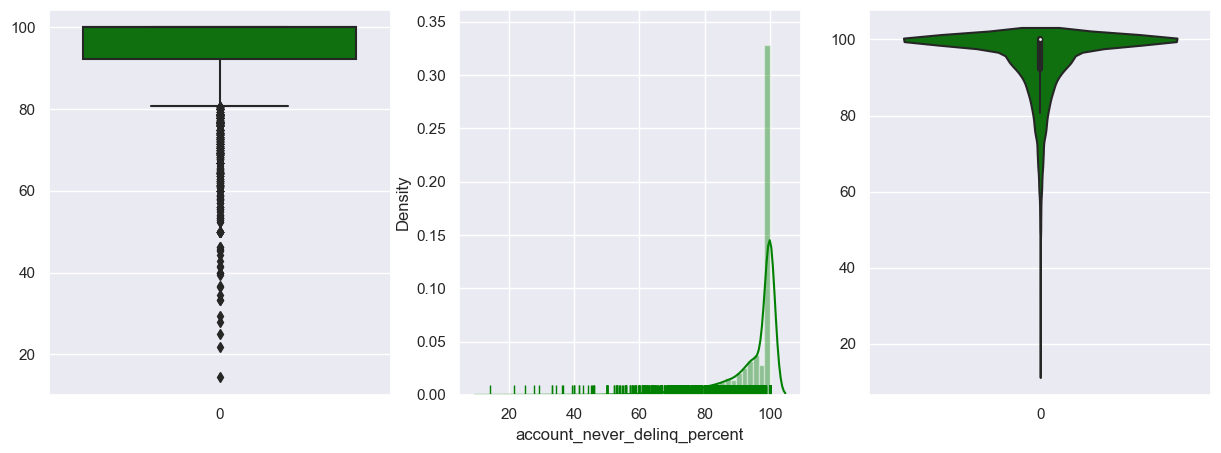

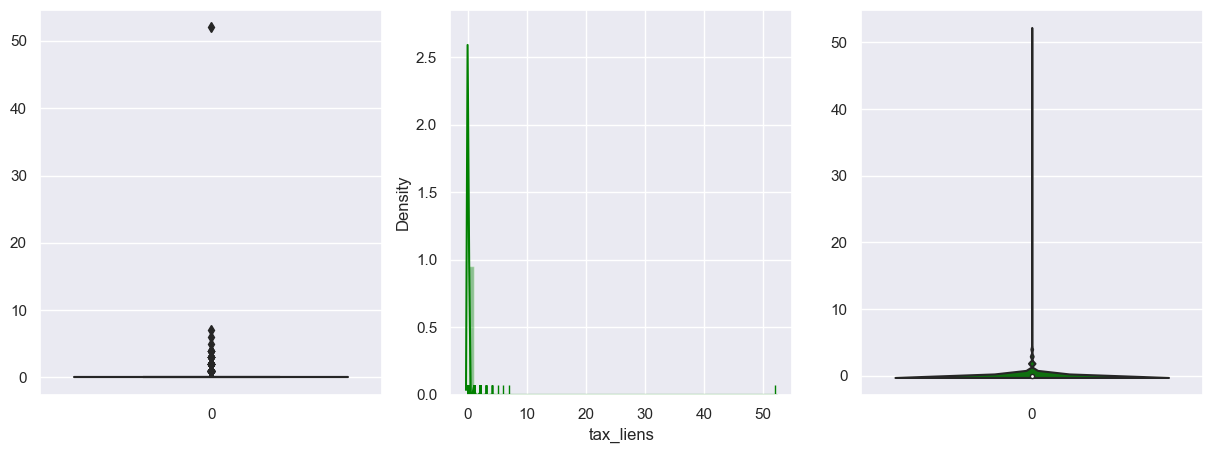

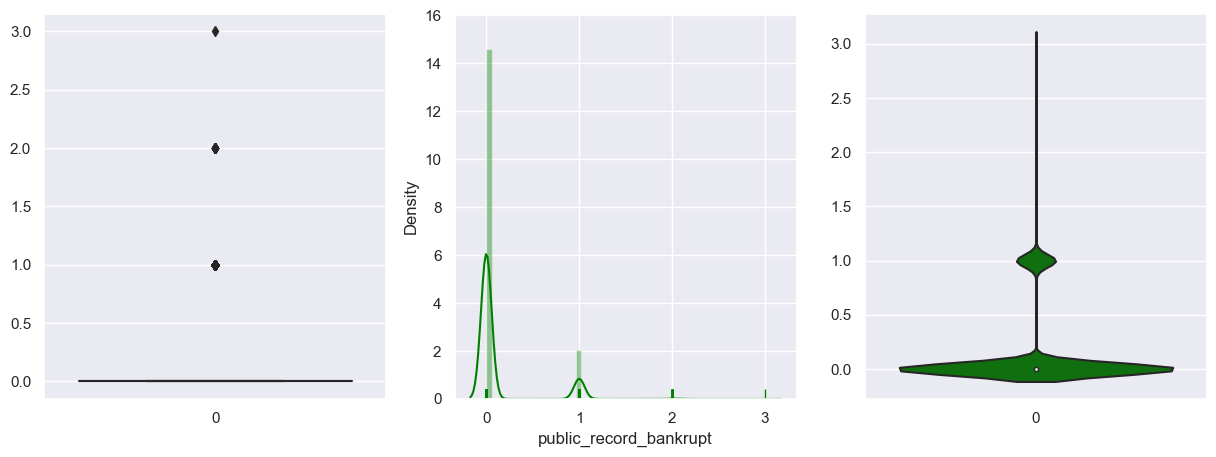

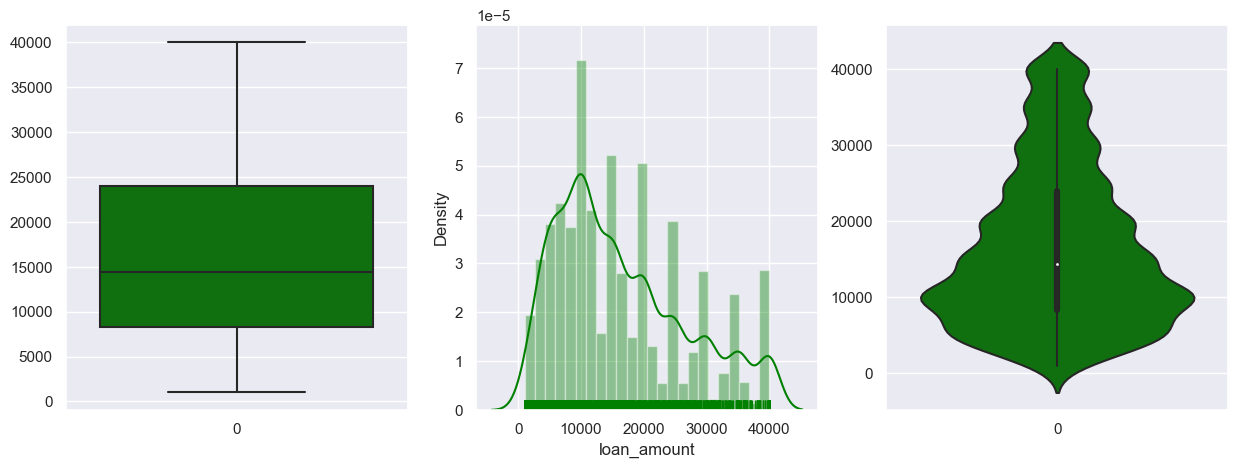

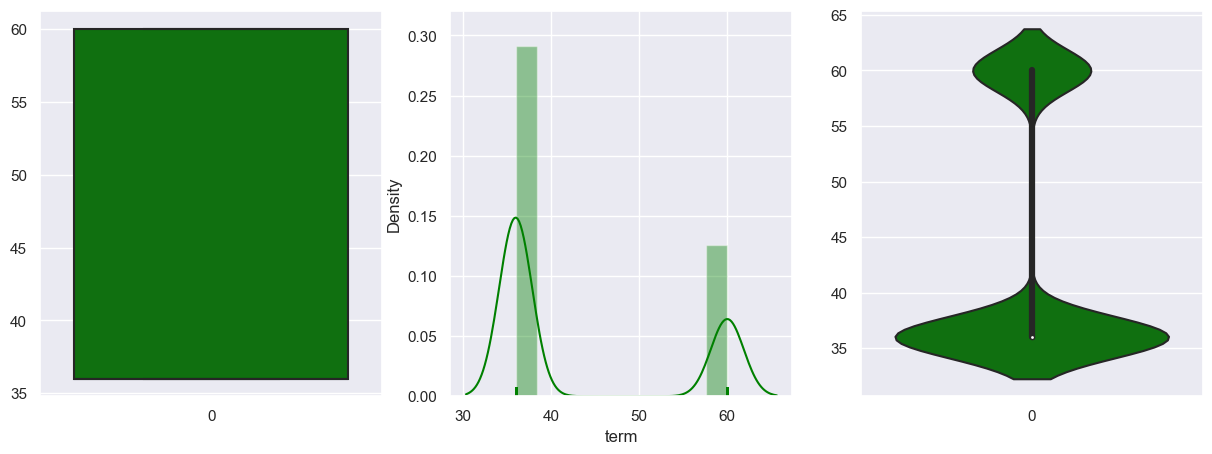

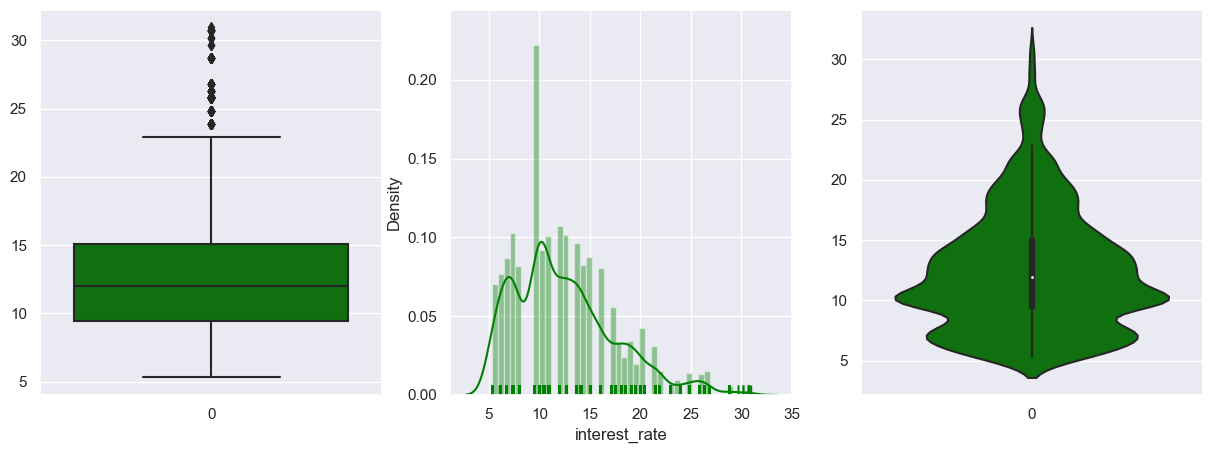

In [71]:
# Plotting numerical data

plt.figure(figsize = (15,6))

for i in enumerate(data_nums):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(data_nums[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(data_nums[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(data_nums[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()


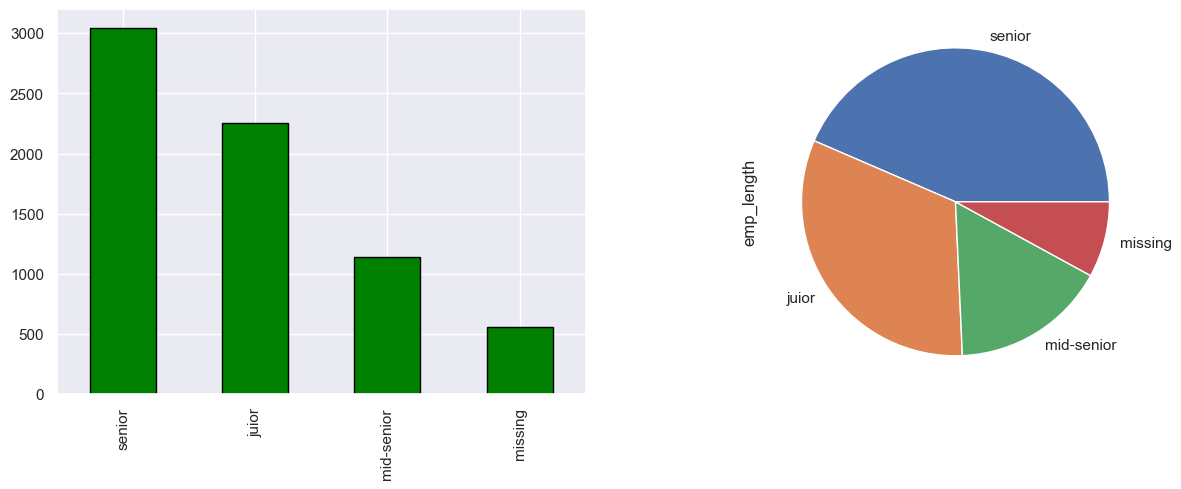

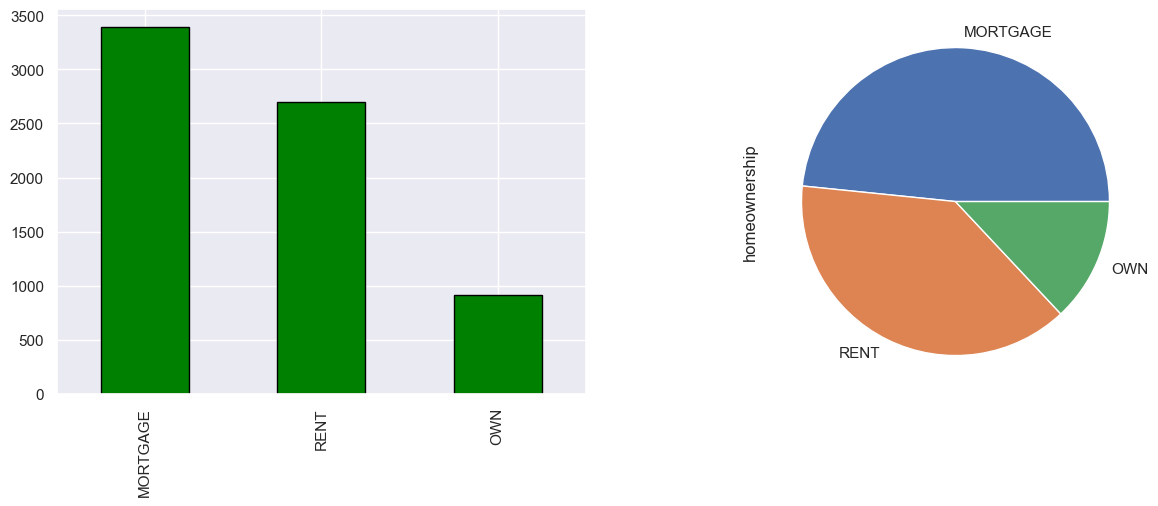

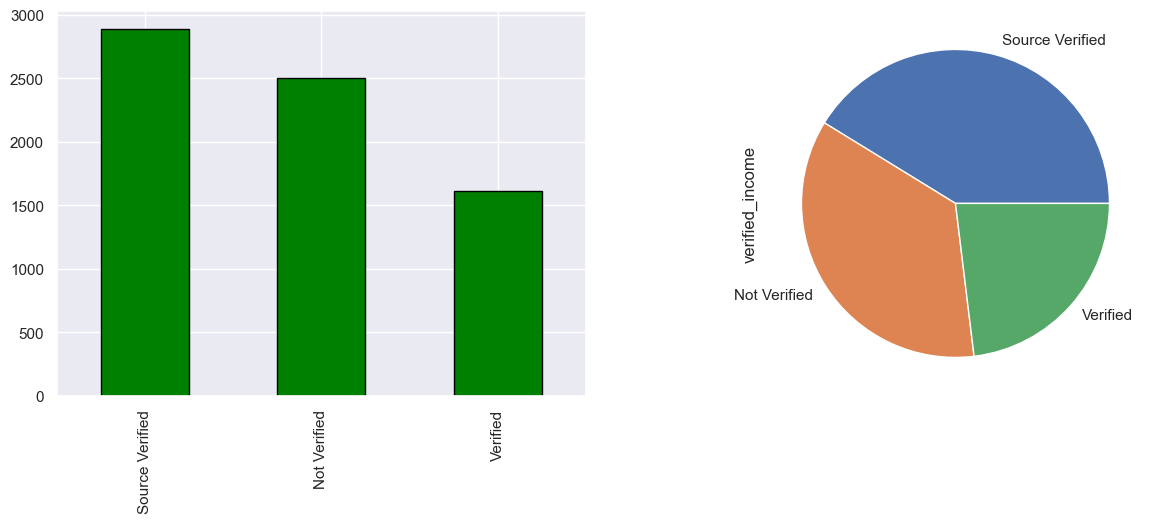

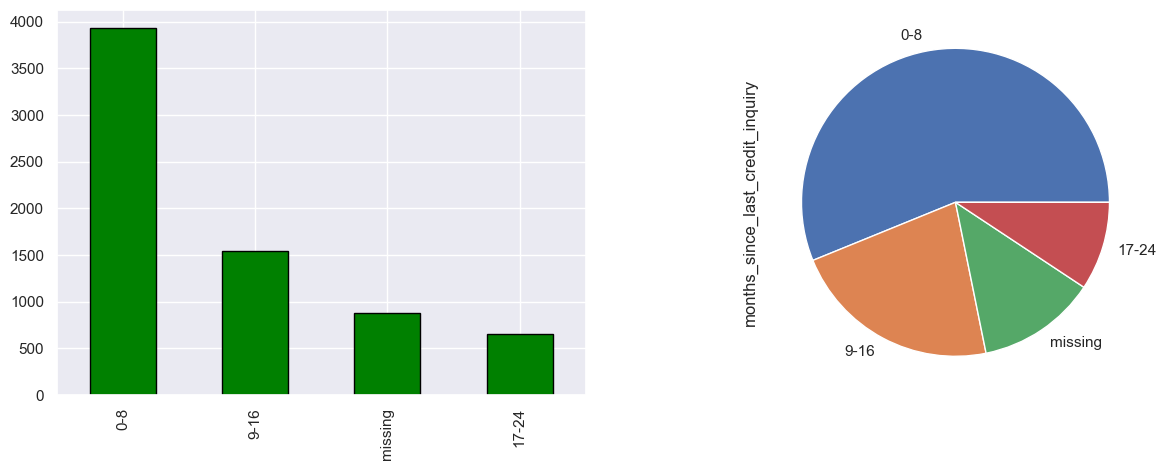

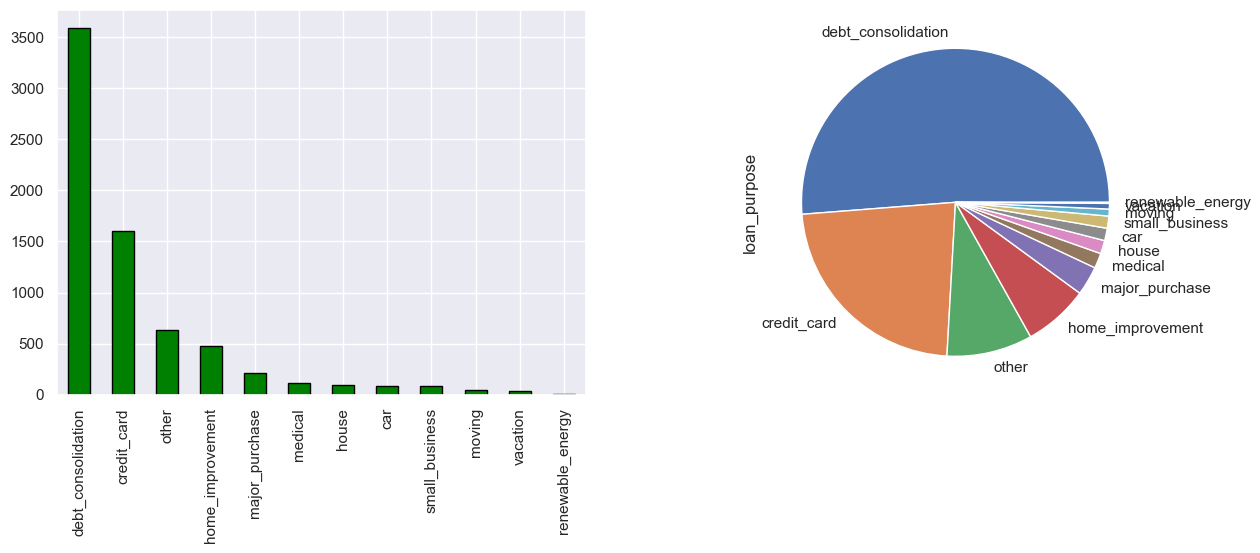

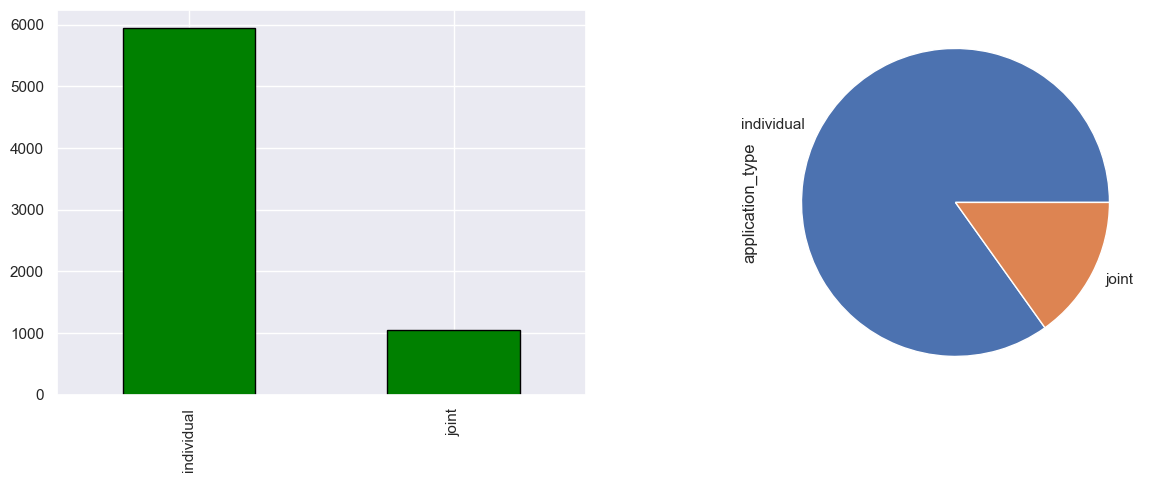

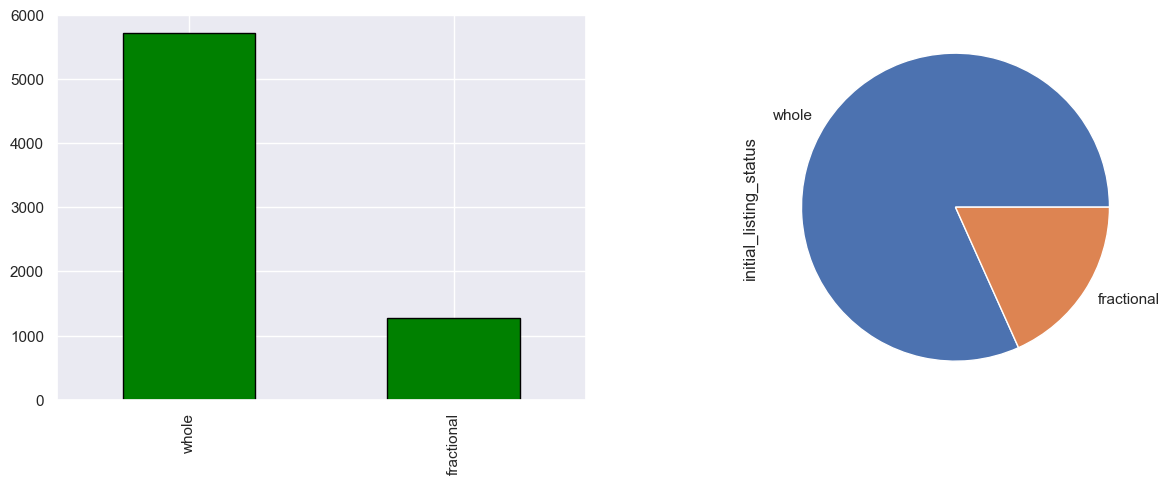

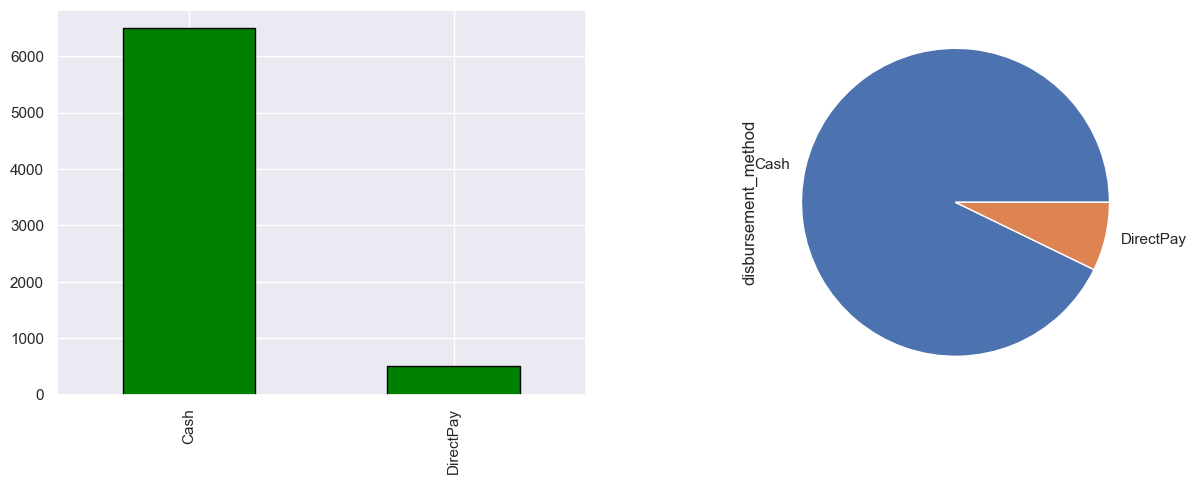

In [72]:

for i in enumerate(data_cate):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    data_cate[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    data_cate[i[1]].value_counts().plot.pie()
    
    plt.show()


In [73]:
for i in data_cate.columns:
    print(i)
    print(len(data[i].value_counts(dropna=False)))
    print()

emp_length
4

homeownership
3

verified_income
3

months_since_last_credit_inquiry
4

loan_purpose
12

application_type
2

initial_listing_status
2

disbursement_method
2



In [74]:
data.head()

emp_length homeownership  annual_income  verified_income  debt_to_income  \
0      juior          RENT        45000.0  Source Verified            6.71   
1     senior          RENT        68000.0  Source Verified           18.99   
2     senior           OWN        15000.0  Source Verified           20.83   
3      juior      MORTGAGE        35000.0         Verified           35.56   
4      juior          RENT        34000.0     Not Verified           13.20   

   delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0          0                  2011                   0                   5   
1          0                  1971                   1                  14   
2          0                  2007                   1                   9   
3          0                  2007                   3                  16   
4          0                  2011                   0                   8   

   open_credit_lines  total_credit_limit  total_credit_utilized  \
0                  4                9300                   7743   
1                  5               44050                  34712   
2                  5               19300                   6502   
3                  8               76236                  36051   
4                  8               20577                  18633   

   num_collections_last_12m  num_historical_failed_to_pay  \
0                         0                             0   
1                         0                             1   
2                         0                             0   
3                         1                             0   
4                         0                             0   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                           239   
4                        0                             0   

   current_installment_accounts  accounts_opened_24m  \
0                             0                    0   
1                             2                    3   
2                             0                    1   
3                             3                    1   
4                             6                    3   

  months_since_last_credit_inquiry  num_satisfactory_accounts  \
0                          missing                          4   
1                              0-8                          5   
2                              0-8                          5   
3                              0-8                          8   
4                            17-24                          8   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          3               7600   
1                          0                          2              16000   
2                          0                          4              19300   
3                          0                          2               8000   
4                          0                          1               1000   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                      5                     4                        4   
1                     10                     3                        2   
2                      7                     5                        4   
3                      6                     4                        3   
4                      2                     2                        2   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  0                         100.0          0   
1                  1                         100.0          0   
2                  0                         100.0          0   
3                  1     

### Data Visualization

- Bivariate analysis

### Outlier treatment

In [75]:
for i in data_nums.columns:
    print(i)
    print(data_nums[i].quantile([0.1,0.9,0.95,0.99]))
    print(data_nums[i].describe())
    print('\n')

annual_income
0.10     32000.0
0.90    137000.0
0.95    175000.0
0.99    300000.0
Name: annual_income, dtype: float64
count    7.000000e+03
mean     7.949433e+04
std      6.634772e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      2.300000e+06
Name: annual_income, dtype: float64


debt_to_income
0.10     6.139
0.90    32.611
0.95    37.171
0.99    57.961
Name: debt_to_income, dtype: float64
count    7000.000000
mean       19.257691
std        14.472647
min         0.000000
25%        11.060000
50%        17.540000
75%        24.990000
max       469.090000
Name: debt_to_income, dtype: float64


delinq_2y
0.10    0.0
0.90    1.0
0.95    1.0
0.99    3.0
Name: delinq_2y, dtype: float64
count    7000.000000
mean        0.218000
std         0.683875
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: delinq_2y, dtype: float64


earliest_credit_line
0.10    1990.0
0.90    2010.0
0.95  

count    7000.00000
mean       12.47482
std         5.01296
min         5.31000
25%         9.43000
50%        11.98000
75%        15.05000
max        30.94000
Name: interest_rate, dtype: float64




In [76]:
data_nums.columns

Index(['annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate'],
      dtype='object')

In [77]:
quartile_1 = data['annual_income'].quantile(0.99)
data = data[data["annual_income"] < quartile_1]

#quartile_1 = data_test['annual_income'].quantile(0.99)
#data_test = data_test[data_test["annual_income"] < quartile_1]

In [78]:
data.shape

(6926, 37)

In [79]:
quartile_2 = data['debt_to_income'].quantile(0.99)
data = data[data["debt_to_income"] < quartile_2]

#quartile_2 = data_test['debt_to_income'].quantile(0.99)
#data_test = data_test[data_test["debt_to_income"] < quartile_2]

In [80]:
data.shape

(6856, 37)

In [81]:
quartile_3 = data['total_credit_limit'].quantile(0.99)
data = data[data["total_credit_limit"] < quartile_3]

#quartile_3 = data_test['total_credit_limit'].quantile(0.99)
#data_test = data_test[data_test["total_credit_limit"] < quartile_3]

In [82]:
data.shape

(6787, 37)

In [83]:
quartile_4 = data['total_credit_utilized'].quantile(0.99)
data = data[data["total_credit_utilized"] < quartile_4]

#quartile_4 = data_test['total_credit_utilized'].quantile(0.99)
#data_test = data_test[data_test["total_credit_utilized"] < quartile_4]

In [84]:
data.shape

(6719, 37)

In [85]:
#quartile_5 = data['tax_liens'].quantile(0.95)
#data = data[data["tax_liens"] < quartile_5]

In [86]:
data.shape

(6719, 37)

In [87]:
quartile_6 = data['total_collection_amount_ever'].quantile(0.99)
data = data[data["total_collection_amount_ever"] < quartile_6]


#quartile_6 = data_test['total_collection_amount_ever'].quantile(0.99)
#data_test = data_test[data_test["total_collection_amount_ever"] < quartile_6]

In [88]:
data.shape

(6651, 37)

In [89]:
quartile_7 = data['num_mort_accounts'].quantile(0.99)
data = data[data["num_mort_accounts"] < quartile_7]

#quartile_7 = data_test['num_mort_accounts'].quantile(0.99)
#data_test = data_test[data_test["num_mort_accounts"] < quartile_7]

In [90]:
data.shape

(6577, 37)

In [91]:
quartile_8 = data['num_active_debit_accounts'].quantile(0.99)
data = data[data["num_active_debit_accounts"] < quartile_8]

#quartile_8 = data_test['num_active_debit_accounts'].quantile(0.99)
#data_test = data_test[data_test["num_active_debit_accounts"] < quartile_8]

In [92]:
data.shape

(6480, 37)

In [93]:
quartile_9 = data['num_total_cc_accounts'].quantile(0.99)
data = data[data["num_total_cc_accounts"] < quartile_9]

#quartile_9 = data_test['num_total_cc_accounts'].quantile(0.99)
#data_test = data_test[data_test["num_total_cc_accounts"] < quartile_9]

In [94]:
data.shape

(6405, 37)

In [95]:
quartile_10 = data['num_historical_failed_to_pay'].quantile(0.99)
data = data[data["num_historical_failed_to_pay"] < quartile_10]

#quartile_10 = data_test['num_historical_failed_to_pay'].quantile(0.99)
#data_test = data_test[data_test["num_historical_failed_to_pay"] < quartile_10]

In [96]:
data.shape

(6325, 37)

### Feature Engineering


In [97]:
data.head(10)

emp_length homeownership  annual_income  verified_income  debt_to_income  \
0        juior          RENT        45000.0  Source Verified            6.71   
1       senior          RENT        68000.0  Source Verified           18.99   
2       senior           OWN        15000.0  Source Verified           20.83   
3        juior      MORTGAGE        35000.0         Verified           35.56   
4        juior          RENT        34000.0     Not Verified           13.20   
5        juior      MORTGAGE        50000.0         Verified           17.38   
6   mid-senior          RENT        80500.0     Not Verified           22.63   
7       senior          RENT        85000.0  Source Verified           22.33   
9        juior           OWN        75000.0     Not Verified           36.96   
10       juior          RENT        81000.0     Not Verified           32.35   

    delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0           0                  2011                   0                   5   
1           0                  1971                   1                  14   
2           0                  2007                   1                   9   
3           0                  2007                   3                  16   
4           0                  2011                   0                   8   
5           0                  2005                   2                  24   
6           0                  2005                   0                  28   
7           0                  2013                   7                  23   
9           0                  2003                   0                  46   
10          0                  1988                   0                  27   

    open_credit_lines  total_credit_limit  total_credit_utilized  \
0                   4                9300                   7743   
1                   5               44050                  34712   
2                   5               19300                   6502   
3                   8               76236                  36051   
4                   8               20577                  18633   
5                  11               49557                  25633   
6                  12               83671                  66485   
7                  22              102080                  67427   
9                  30              180063                  87133   
10                  8              108555                  67815   

    num_collections_last_12m  num_historical_failed_to_pay  \
0                          0                             0   
1                          0                             1   
2                          0                             0   
3                          1                             0   
4                          0                             0   
5                          0                             1   
6                          1                             0   
7                          0                             0   
9                          0                             0   
10                         0                             0   

    current_accounts_delinq  total_collection_amount_ever  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                           239   
4                         0                             0   
5                         0                           619   
6                         0                             0   
7                         0                             0   
9                         0                             0   
10                        0                           160   

    current_installment_accounts  accounts_opened_24m  \
0                              0                    0   
1                              2   

In [98]:
for i in data_cate.columns:
    emp_length = pd.get_dummies(data[i], drop_first=True)
    data = pd.concat([data, emp_length], axis = 1)

In [99]:
data_test_nums = data_test.select_dtypes(include="object")

In [100]:
for i in data_test_nums.columns:
    emp_length = pd.get_dummies(data_test[i], drop_first=True)
    data_test = pd.concat([data_test, emp_length], axis = 1)

In [101]:
data.head()

emp_length homeownership  annual_income  verified_income  debt_to_income  \
0      juior          RENT        45000.0  Source Verified            6.71   
1     senior          RENT        68000.0  Source Verified           18.99   
2     senior           OWN        15000.0  Source Verified           20.83   
3      juior      MORTGAGE        35000.0         Verified           35.56   
4      juior          RENT        34000.0     Not Verified           13.20   

   delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0          0                  2011                   0                   5   
1          0                  1971                   1                  14   
2          0                  2007                   1                   9   
3          0                  2007                   3                  16   
4          0                  2011                   0                   8   

   open_credit_lines  total_credit_limit  total_credit_utilized  \
0                  4                9300                   7743   
1                  5               44050                  34712   
2                  5               19300                   6502   
3                  8               76236                  36051   
4                  8               20577                  18633   

   num_collections_last_12m  num_historical_failed_to_pay  \
0                         0                             0   
1                         0                             1   
2                         0                             0   
3                         1                             0   
4                         0                             0   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                           239   
4                        0                             0   

   current_installment_accounts  accounts_opened_24m  \
0                             0                    0   
1                             2                    3   
2                             0                    1   
3                             3                    1   
4                             6                    3   

  months_since_last_credit_inquiry  num_satisfactory_accounts  \
0                          missing                          4   
1                              0-8                          5   
2                              0-8                          5   
3                              0-8                          8   
4                            17-24                          8   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          3               7600   
1                          0                          2              16000   
2                          0                          4              19300   
3                          0                          2               8000   
4                          0                          1               1000   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                      5                     4                        4   
1                     10                     3                        2   
2                      7                     5                        4   
3                      6                     4                        3   
4                      2                     2                        2   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  0                         100.0          0   
1                  1                         100.0          0   
2                  0                         100.0          0   
3                  1     

In [102]:
data_test.head()

emp_length homeownership  annual_income  verified_income  debt_to_income  \
0       juior      MORTGAGE        75000.0     Not Verified           26.19   
1  mid-senior          RENT        28000.0  Source Verified           21.86   
2       juior      MORTGAGE        25992.0         Verified            9.25   
3     missing          RENT        33000.0  Source Verified            3.89   
4      senior          RENT        47000.0     Not Verified           15.82   

   delinq_2y  earliest_credit_line  inquiries_last_12m  total_credit_lines  \
0          0                  1986                   1                  21   
1          0                  2004                   1                  10   
2          1                  1995                   1                   9   
3          0                  1998                   3                  47   
4          0                  1996                   0                  18   

   open_credit_lines  total_credit_limit  total_credit_utilized  \
0                 11              280228                  62194   
1                  2                2200                   1495   
2                  6               50300                   6968   
3                 23               30100                   3906   
4                  4               27979                  24400   

   num_collections_last_12m  num_historical_failed_to_pay  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   current_installment_accounts  accounts_opened_24m  \
0                             5                    2   
1                             0                    2   
2                             0                    2   
3                             0                   10   
4                             1                    2   

  months_since_last_credit_inquiry  num_satisfactory_accounts  \
0                              0-8                         11   
1                              0-8                          2   
2                             9-16                          6   
3                              0-8                         22   
4                          missing                          4   

   num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  \
0                          0                          4              48000   
1                          0                          1               1000   
2                          0                          3              36000   
3                          0                          2              16800   
4                          0                          2              10700   

   num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  \
0                      8                     5                        5   
1                      7                     2                        2   
2                      7                     6                        4   
3                     45                    23                        4   
4                      7                     3                        3   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  2                          95.2          0   
1                  0                         100.0          0   
2                  0                          88.9          0   
3                  1

In [103]:
data = data.drop(data_cate, axis= 1)

data_test = data_test.drop(data_test_nums, axis= 1)

In [104]:
data.shape

(6325, 53)

In [105]:
data_test.shape

(3000, 52)

In [106]:
data_test.head()

annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0        75000.0           26.19          0                  1986   
1        28000.0           21.86          0                  2004   
2        25992.0            9.25          1                  1995   
3        33000.0            3.89          0                  1998   
4        47000.0           15.82          0                  1996   

   inquiries_last_12m  total_credit_lines  open_credit_lines  \
0                   1                  21                 11   
1                   1                  10                  2   
2                   1                   9                  6   
3                   3                  47                 23   
4                   0                  18                  4   

   total_credit_limit  total_credit_utilized  num_collections_last_12m  \
0              280228                  62194                         0   
1                2200                   1495                         0   
2               50300                   6968                         0   
3               30100                   3906                         0   
4               27979                  24400                         0   

   num_historical_failed_to_pay  current_accounts_delinq  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             1                        0   
4                             0                        0   

   total_collection_amount_ever  current_installment_accounts  \
0                             0                             5   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             1   

   accounts_opened_24m  num_satisfactory_accounts  num_accounts_30d_past_due  \
0                    2                         11                          0   
1                    2                          2                          0   
2                    2                          6                          0   
3                   10                         22                          0   
4                    2                          4                          0   

   num_active_debit_accounts  total_debit_limit  num_total_cc_accounts  \
0                          4              48000                      8   
1                          1               1000                      7   
2                          3              36000                      7   
3                          2              16800                     45   
4                          2              10700                      7   

   num_open_cc_accounts  num_cc_carrying_balance  num_mort_accounts  \
0                     5                        5                  2   
1                     2                        2                  0   
2                     6                        4                  0   
3                    23                        4                  1   
4                     3                        3                  0   

   account_never_delinq_percent  tax_liens  public_record_bankrupt  \
0                          95.2          0                       0   
1                         100.0          0                       0   
2                          88.9          0                       0   
3                         100.0          0                       1   
4                          94.4          0                       0   

   loan_amount  term  mid-senior  missing  senior  OWN  RENT  Source Verified  \
0        20000    60           0        0       0    0     0                0   
1         2000    36           1        0       0    0     1          

In [107]:
data.shape

(6325, 53)

<AxesSubplot:>

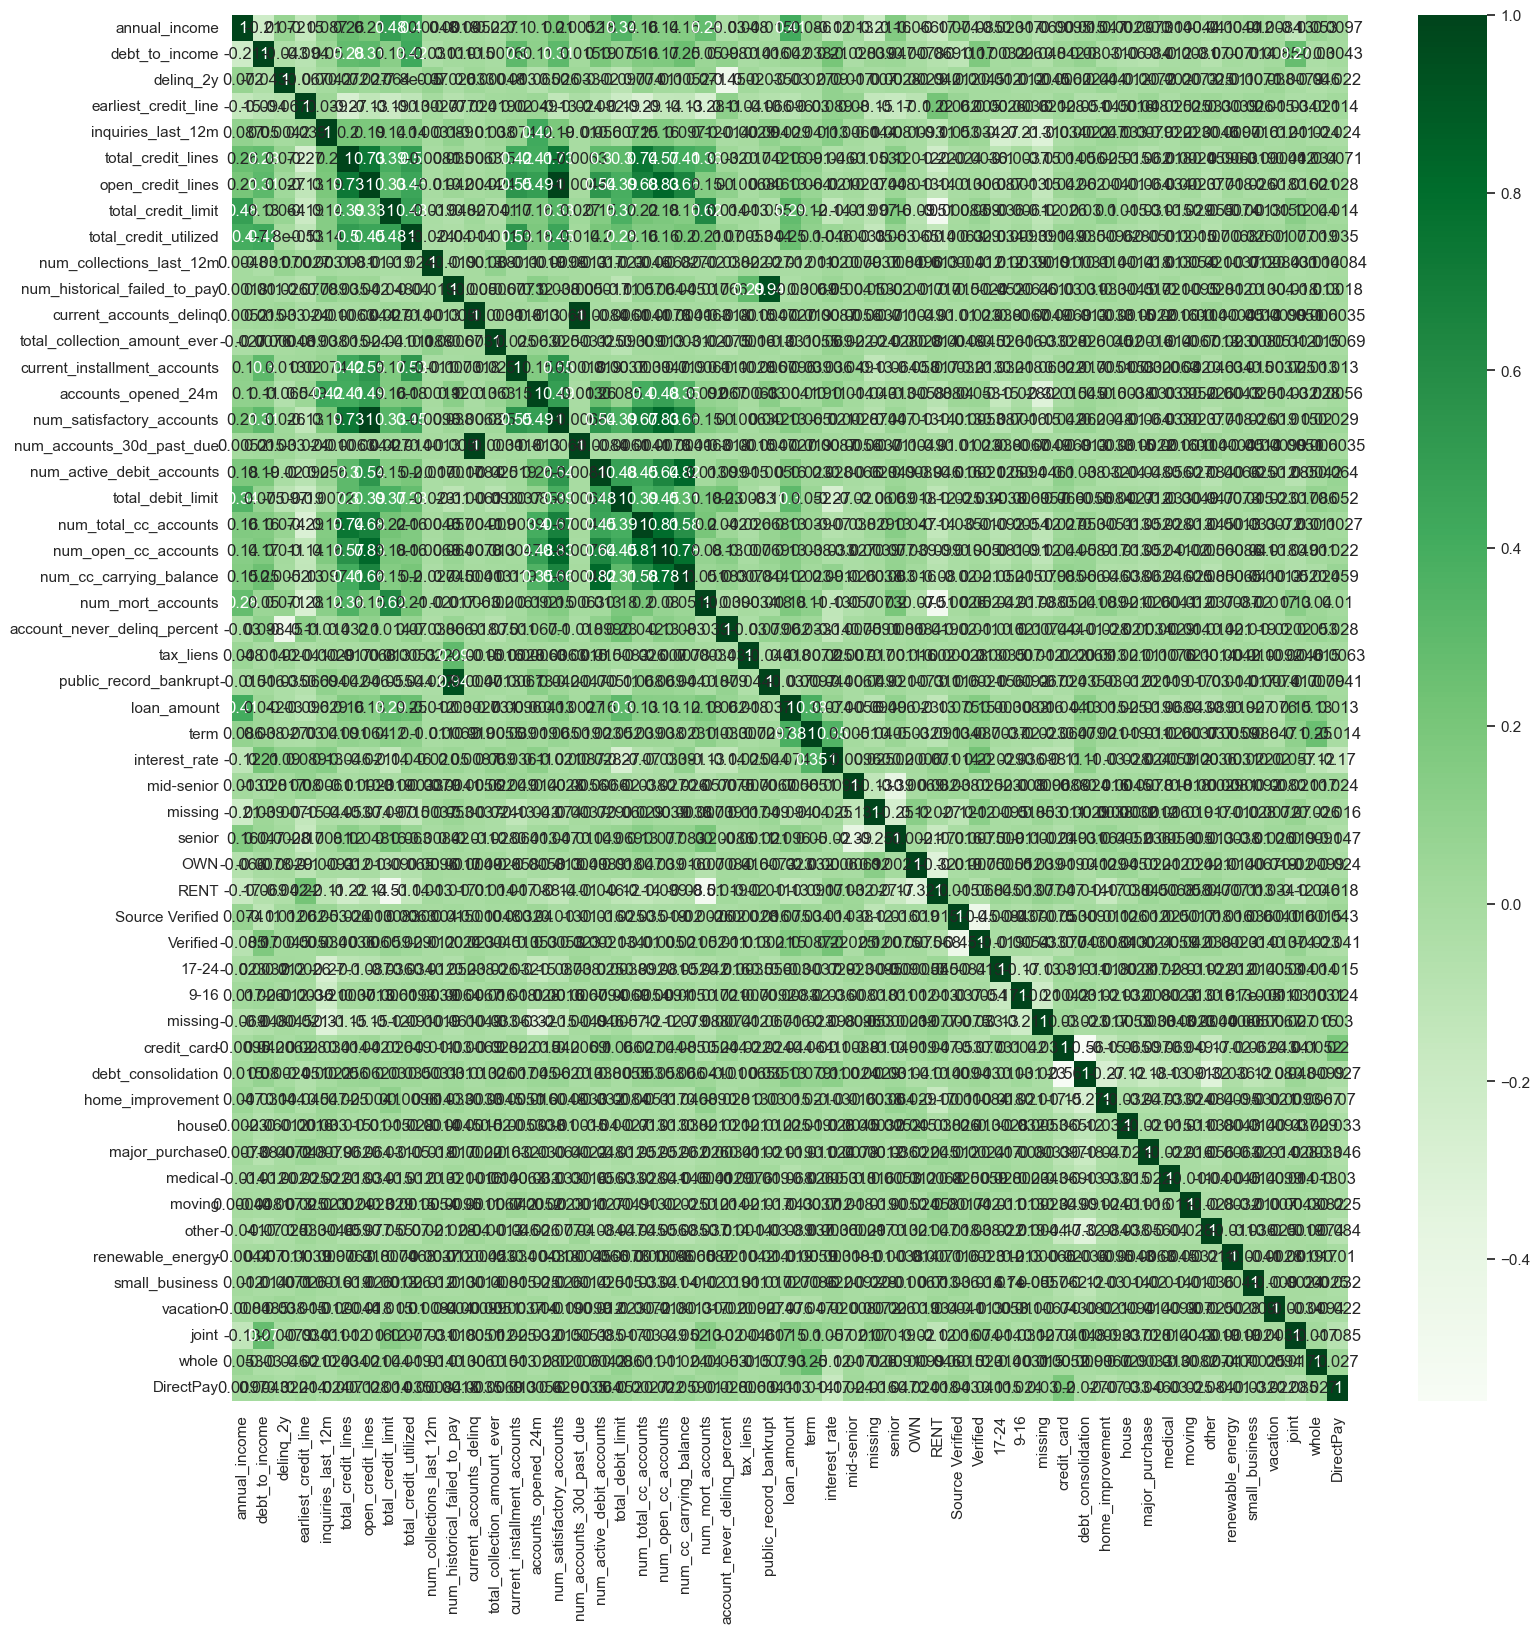

In [108]:
# Checking correlation
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot = True, cmap='Greens')

In [109]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print()
print(get_top_abs_correlations(data, 30))

Top Absolute Correlations

current_accounts_delinq       num_accounts_30d_past_due       1.000000
open_credit_lines             num_satisfactory_accounts       0.999467
num_historical_failed_to_pay  public_record_bankrupt          0.942232
open_credit_lines             num_open_cc_accounts            0.828357
num_satisfactory_accounts     num_open_cc_accounts            0.827985
num_active_debit_accounts     num_cc_carrying_balance         0.821998
num_total_cc_accounts         num_open_cc_accounts            0.809994
num_open_cc_accounts          num_cc_carrying_balance         0.781029
total_credit_lines            num_total_cc_accounts           0.744449
                              open_credit_lines               0.727013
                              num_satisfactory_accounts       0.725443
open_credit_lines             num_total_cc_accounts           0.676682
num_satisfactory_accounts     num_total_cc_accounts           0.674329
open_credit_lines             num_cc_carrying_bala

In [110]:
data = data.drop(['num_total_cc_accounts',
                  'num_cc_carrying_balance',
                  'num_open_cc_accounts',
                  'current_accounts_delinq',
                  'open_credit_lines', 
                  'num_historical_failed_to_pay',
                  'num_satisfactory_accounts',
                  'num_active_debit_accounts',
                  'num_total_cc_accounts',
                  'total_credit_lines',
                  'total_credit_limit',
                  'credit_card',
                  'current_installment_accounts','RENT','accounts_opened_24m'], axis=1)

data_test = data_test.drop(['num_total_cc_accounts',
                  'num_cc_carrying_balance',
                  'num_open_cc_accounts',
                  'current_accounts_delinq',
                  'open_credit_lines', 
                  'num_historical_failed_to_pay',
                  'num_satisfactory_accounts',
                  'num_active_debit_accounts',
                  'num_total_cc_accounts',
                  'total_credit_lines',
                  'total_credit_limit',
                  'credit_card',
                  'current_installment_accounts','RENT','accounts_opened_24m'], axis=1)

In [111]:
data.head()

annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
0        45000.0            6.71          0                  2011   
1        68000.0           18.99          0                  1971   
2        15000.0           20.83          0                  2007   
3        35000.0           35.56          0                  2007   
4        34000.0           13.20          0                  2011   

   inquiries_last_12m  total_credit_utilized  num_collections_last_12m  \
0                   0                   7743                         0   
1                   1                  34712                         0   
2                   1                   6502                         0   
3                   3                  36051                         1   
4                   0                  18633                         0   

   total_collection_amount_ever  num_accounts_30d_past_due  total_debit_limit  \
0                             0                          0               7600   
1                             0                          0              16000   
2                             0                          0              19300   
3                           239                          0               8000   
4                             0                          0               1000   

   num_mort_accounts  account_never_delinq_percent  tax_liens  \
0                  0                         100.0          0   
1                  1                         100.0          0   
2                  0                         100.0          0   
3                  1                          93.8          0   
4                  0                         100.0          0   

   public_record_bankrupt  loan_amount  term  interest_rate  mid-senior  \
0                       0        12000    60          19.03           0   
1                       1         7200    36          16.01           0   
2                       0         5000    36          11.99           0   
3                       0        12800    60          23.88           0   
4                       0         1200    36          10.90           0   

   missing  senior  OWN  Source Verified  Verified  17-24  9-16  missing  \
0        0       0    0                1         0      0     0        1   
1        0       1    0                1         0      0     0        0   
2        0       1    1                1         0      0     0        0   
3        0       0    0                0         1      0     0        0   
4        0       0    0                0         0      1     0        0   

   debt_consolidation  home_improvement  house  major_purchase  medical  \
0                   1                 0      0               0        0   
1                   0                 0      0               0        0   
2                   0                 0      0               0        0   
3                   1                 0      0               0        0   
4                   0                 0      0               0        0   

   moving  other  renewable_energy  small_business  vacation  joint  whole  \
0       0      0                 0               0         0      0      1   
1       0      0                 0               1         0      0      1   
2       0      0                 0               0         0      0      1   
3       0      0                 0               0         0      0      1   
4       0      0                 0               0         0      0      1   

   DirectPay  
0          0  
1          0  
2          0  
3          1  
4          0

In [112]:
data.shape

(6325, 39)

In [113]:
data_test.shape

(3000, 38)

### Data Pre-Processing

In [114]:
# Train-test split

from sklearn.model_selection import train_test_split

In [115]:
# Splitting dataset into train and test with train size 0.7

df_train, df_test = train_test_split(data, train_size = 0.75, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(4743, 39)
(1582, 39)


In [116]:
# Checking numerical columns for scaling.

df_train.describe()

annual_income  debt_to_income    delinq_2y  earliest_credit_line  \
count    4743.000000     4743.000000  4743.000000           4743.000000   
mean    72621.928299       18.532741     0.213789           2001.714105   
std     40420.585133       10.093341     0.667246              7.595065   
min         0.000000        0.000000     0.000000           1964.000000   
25%     45000.000000       11.070000     0.000000           1998.000000   
50%     65000.000000       17.510000     0.000000           2003.000000   
75%     90000.000000       24.760000     0.000000           2007.000000   
max    289139.000000       57.960000    13.000000           2015.000000   

       inquiries_last_12m  total_credit_utilized  num_collections_last_12m  \
count         4743.000000            4743.000000               4743.000000   
mean             1.889943           44991.403542                  0.013072   
std              2.336449           38048.089212                  0.127585   
min              0.000000               0.000000                  0.000000   
25%              0.000000           18174.000000                  0.000000   
50%              1.000000           34529.000000                  0.000000   
75%              3.000000           60530.000000                  0.000000   
max             24.000000          219555.000000                  3.000000   

       total_collection_amount_ever  num_accounts_30d_past_due  \
count                   4743.000000                4743.000000   
mean                     101.327852                   0.000211   
std                      409.107546                   0.014520   
min                        0.000000                   0.000000   
25%                        0.000000                   0.000000   
50%                        0.000000                   0.000000   
75%                        0.000000                   0.000000   
max                     4110.000000                   1.000000   

       total_debit_limit  num_mort_accounts  account_never_delinq_percent  \
count        4743.000000        4743.000000                   4743.000000   
mean        24784.661185           1.243095                     94.470209   
std         22952.561760           1.498256                      9.287564   
min             0.000000           0.000000                     25.000000   
25%          9450.000000           0.000000                     92.300000   
50%         18300.000000           1.000000                    100.000000   
75%         33400.000000           2.000000                    100.000000   
max        218100.000000           6.000000                    100.000000   

         tax_liens  public_record_bankrupt   loan_amount         term  \
count  4743.000000             4743.000000   4743.000000  4743.000000   
mean      0.012439                0.125448  15881.261860    43.316888   
std       0.110848                0.331261  10049.745132    11.049625   
min       0.000000                0.000000   1000.000000    36.000000   
25%       0.000000                0.000000   8000.000000    36.000000   
50%       0.000000                0.000000  14000.000000    36.000000   
75%       0.000000                0.000000  21550.000000    60.000000   
max       1.000000                1.000000  40000.000000    60.000000   

       interest_rate   mid-senior      missing       senior          OWN  \
count    4743.000000  4743.000000  4743.000000  4743.000000  4743.000000   
mean       12.590474     0.167615     0.078010     0.426102     0.129665   
std         5.056856     0.373564     0.268215     0.494561     0.335970   
min         5.310000     0.000000     0.000000     0.000000     0.000000   
25%         9.430000     0.000000     0.000000     0.000000     0.000000   
50%        11.980000     0.000000     0.000000     0.000000     0.000000   
75%        15.050000     0.000000     0.000000     1.000000     0.000000   
max        30.790000     1.000000     1.000000     1.000000     1.000000 

In [117]:
df_test.describe()

annual_income  debt_to_income    delinq_2y  earliest_credit_line  \
count    1582.000000     1582.000000  1582.000000           1582.000000   
mean    74669.150341       18.053363     0.218710           2001.510746   
std     42471.849162        9.785218     0.699836              7.624377   
min         0.000000        0.000000     0.000000           1969.000000   
25%     45000.000000       10.740000     0.000000           1998.000000   
50%     65000.000000       17.100000     0.000000           2003.000000   
75%     93655.250000       24.400000     0.000000           2006.000000   
max    290000.000000       55.270000     9.000000           2015.000000   

       inquiries_last_12m  total_credit_utilized  num_collections_last_12m  \
count         1582.000000            1582.000000               1582.000000   
mean             1.852718           45693.597977                  0.011378   
std              2.280002           38378.296432                  0.106093   
min              0.000000               0.000000                  0.000000   
25%              0.000000           18599.750000                  0.000000   
50%              1.000000           35144.500000                  0.000000   
75%              3.000000           61764.250000                  0.000000   
max             22.000000          218227.000000                  1.000000   

       total_collection_amount_ever  num_accounts_30d_past_due  \
count                    1582.00000                     1582.0   
mean                       81.19469                        0.0   
std                       354.81639                        0.0   
min                         0.00000                        0.0   
25%                         0.00000                        0.0   
50%                         0.00000                        0.0   
75%                         0.00000                        0.0   
max                      4174.00000                        0.0   

       total_debit_limit  num_mort_accounts  account_never_delinq_percent  \
count        1582.000000        1582.000000                   1582.000000   
mean        25906.295828           1.241466                     94.461441   
std         22539.113460           1.517713                      9.550289   
min             0.000000           0.000000                     14.300000   
25%         10000.000000           0.000000                     92.375000   
50%         19300.000000           1.000000                    100.000000   
75%         35450.000000           2.000000                    100.000000   
max        154500.000000           6.000000                    100.000000   

         tax_liens  public_record_bankrupt   loan_amount         term  \
count  1582.000000             1582.000000   1582.000000  1582.000000   
mean      0.016435                0.116308  15839.617573    42.735777   
std       0.127181                0.320696  10223.855136    10.787099   
min       0.000000                0.000000   1000.000000    36.000000   
25%       0.000000                0.000000   8000.000000    36.000000   
50%       0.000000                0.000000  13500.000000    36.000000   
75%       0.000000                0.000000  22000.000000    60.000000   
max       1.000000                1.000000  40000.000000    60.000000   

       interest_rate   mid-senior      missing       senior          OWN  \
count    1582.000000  1582.000000  1582.000000  1582.000000  1582.000000   
mean       12.321833     0.160556     0.077750     0.433628     0.135272   
std         4.945781     0.367237     0.267862     0.495732     0.342122   
min         5.310000     0.000000     0.000000     0.000000     0.000000   
25%         7.970000     0.000000     0.000000     0.000000     0.000000   
50%        11.980000     0.000000     0.000000     0.000000     0.000000   
75%        15.050000     0.000000     0.000000     1.000000     0.000000   
max        30.940000     1.000000     1.000000     1.000000     1.000000 

### Feature Scaling

In [118]:
# Importing Sklearn library for scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [119]:
# Instantiate an object

#scaler = MinMaxScaler()

#df_train_sc = scaler.fit_transform(df_train)

#df_test_sc = scaler.transform(df_test)

In [120]:
#df_train_sc = pd.DataFrame(df_train_sc, columns = df_train.columns)
#df_train_sc.head()

In [121]:
#df_test_sc = pd.DataFrame(df_test_sc, columns = df_test.columns)
#df_test_sc.head()

### Defining X_train & y_train for model building

In [122]:
# Defining the X_train, y_train

y_train = df_train['interest_rate']
X_train = df_train.drop('interest_rate',axis=1)

y_test = df_test['interest_rate']
X_test = df_test.drop('interest_rate',axis=1)

In [123]:
X_train.head()

annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
2609       168000.0           13.40          0                  2008   
6374        55000.0           19.05          0                  2007   
4067        65000.0            2.66          0                  1973   
689        137000.0            1.96          0                  2012   
3049        95000.0           26.84          0                  1971   

      inquiries_last_12m  total_credit_utilized  num_collections_last_12m  \
2609                   6                  65530                         0   
6374                   1                  35053                         0   
4067                   2                   6471                         0   
689                    3                   7172                         0   
3049                   6                  43563                         0   

      total_collection_amount_ever  num_accounts_30d_past_due  \
2609                             0                          0   
6374                             0                          0   
4067                             0                          0   
689                              0                          0   
3049                             0                          0   

      total_debit_limit  num_mort_accounts  account_never_delinq_percent  \
2609              60700                  0                          95.7   
6374              15700                  2                         100.0   
4067              41200                  3                          96.4   
689              183300                  0                         100.0   
3049              35000                  0                         100.0   

      tax_liens  public_record_bankrupt  loan_amount  term  mid-senior  \
2609          0                       0        12000    36           1   
6374          0                       0         9000    36           0   
4067          0                       0        24000    60           0   
689           0                       0         4000    36           0   
3049          0                       1        20000    60           0   

      missing  senior  OWN  Source Verified  Verified  17-24  9-16  missing  \
2609        0       0    0                0         1      0     0        0   
6374        0       0    0                0         0      0     0        0   
4067        0       0    0                0         0      0     0        0   
689         0       0    0                0         0      0     0        0   
3049        0       0    0                0         0      0     0        0   

      debt_consolidation  home_improvement  house  major_purchase  medical  \
2609                   0                 0      0               0        0   
6374                   0                 0      0               0        0   
4067                   0                 1      0               0        0   
689                    1                 0      0               0        0   
3049                   1                 0      0               0        0   

      moving  other  renewable_energy  small_business  vacation  joint  whole  \
2609       0      0                 0               0         0      0      1   
6374       0      0                 0               0         0      0      1   
4067       0      0                 0               0         0      0      1   
689        0      0                 0               0         0      0      1   
3049       0      0                 0               0         0      0      1   

      DirectPay  
2609          1  
6374          1  
4067          0  
689           0  
3049          0

In [124]:
y_train.head()

2609    10.91
6374     6.08
4067     7.35
689      7.35
3049    15.05
Name: interest_rate, dtype: float64

#### Linear Regression
- Fitting a regression line through the training data using statsmodels. by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using sm.add_constant(X).

In [125]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

linear_reg = lr.fit(X_train, y_train)
linear_reg

LinearRegression()

In [126]:
y_pred_lin = linear_reg.predict(X_train)
y_pred_lin

array([ 8.60803479,  7.14337213,  9.33787842, ..., 13.17457692,
       13.41094524, 11.57258236])

In [127]:
# Linear regression metrics

from sklearn import metrics

r2_score_train_lin = metrics.r2_score(y_train, y_pred_lin)

print(f'R2 score train= {r2_score_train_lin}')

R2 score train= 0.3872890104833472


In [128]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_lin)

print(f' MSE train = {MSE_train}')

 MSE train = 15.664817424475904


In [129]:
y_test_pred_lin = linear_reg.predict(X_test)

In [130]:
r2_score_test_lin = metrics.r2_score(y_test, y_test_pred_lin)

print(f'R2 score test = {r2_score_test_lin}')

R2 score test = 0.3884684489318351


In [131]:
MSE_test_lin = metrics.mean_squared_error(y_test,y_test_pred_lin)
print(f'MSE test = {MSE_test_lin}')

MSE test = 14.949067696415318


In [132]:
print(f'R2 score train= {round(r2_score_train_lin,2)}')
print(f'R2 score test = {round(r2_score_test_lin,2)}')

R2 score train= 0.39
R2 score test = 0.39


In [133]:
# Residual analysis

y_res = y_train - y_pred_lin

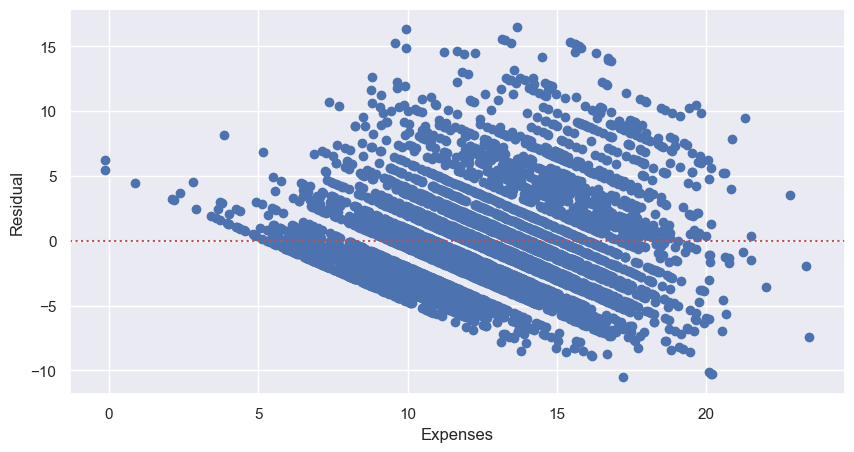

In [134]:
# Residual v/s predictions plot

plt.figure(figsize = (10,5))
plt.scatter( y_pred_lin , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Expenses")
plt.ylabel("Residual")
plt.show()

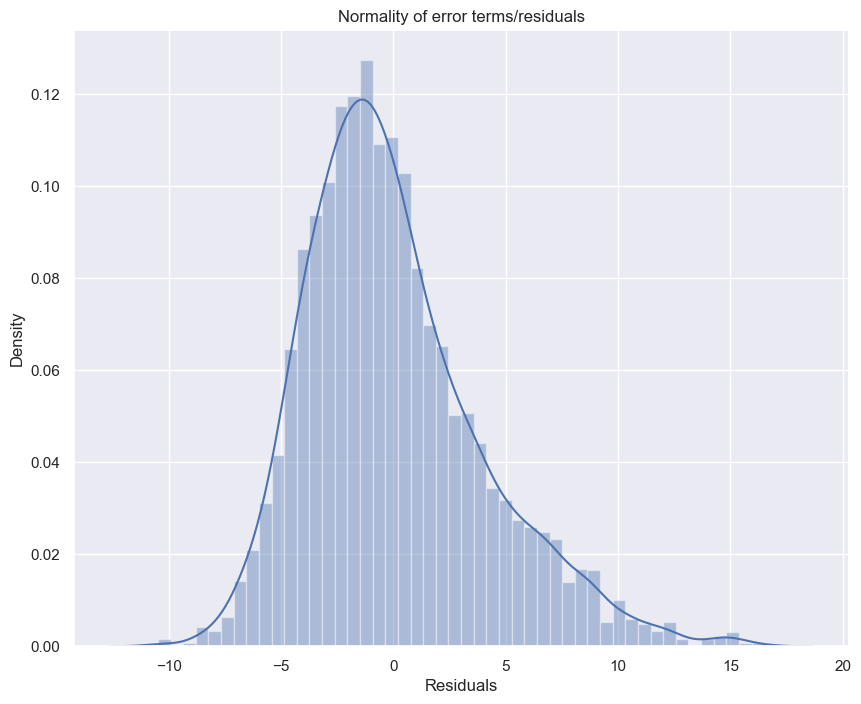

In [135]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

In [136]:
from sklearn.feature_selection import RFE

# Features

features = X_train.columns.tolist()

nof_list = np.arange(1,len(features)+1)   

high_score=0

# Variable to store the optimum features

nof=0  

score_list =[]

for n in range(len(nof_list)):
    
    lr = LinearRegression()
    rfe = RFE(lr,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lr.fit(X_train_rfe,y_train)
    score = lr.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 37
Score with 37 features: 0.388573


In [137]:
#RFE with 8 features

lr = LinearRegression()

rfe = RFE(lr,n_features_to_select=nof)

X_train_rfe = rfe.fit_transform(X_train,y_train)

X_test_rfe = rfe.transform(X_test)

#Fitting the data to model

lr.fit(X_train_rfe,y_train)  

temp = pd.Series(rfe.support_,index = features)

selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['annual_income', 'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_utilized',
       'num_collections_last_12m', 'total_collection_amount_ever',
       'num_accounts_30d_past_due', 'total_debit_limit', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'term', 'mid-senior', 'missing', 'senior', 'OWN', 'Source Verified',
       'Verified', '17-24', '9-16', 'missing', 'debt_consolidation',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'joint',
       'whole', 'DirectPay'],
      dtype='object')


In [138]:
# predictions
y_pred_train_rfe = lr.predict(X_train_rfe)
y_pred_test_rfe = lr.predict(X_test_rfe)

In [139]:
# Function for adjusted r2_score

def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [140]:
# Function for rmse

def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [141]:

# Check R2 score, rmse

from sklearn.metrics import r2_score,mean_squared_error
print('R2 score of train data is ',r2_score(y_train,y_pred_train_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rfe,y_train,y_pred_train_rfe))
print('rmse score of train data is ',rmse(y_train,y_pred_train_rfe))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test_rfe))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test_rfe,y_test,y_pred_test_rfe))
print('rmse score of test data is ',rmse(y_test,y_pred_test_rfe))

R2 score of train data is  0.3872873698070739
Adj. R2 score of train data is  0.3824690133103389
rmse score of train data is  3.9578857197587576

R2 score of test data is  0.38857257821168045
Adj. R2 score of test data is  0.37392049621286705
rmse score of test data is  3.866073230773297


In [142]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [143]:
from sklearn.metrics import r2_score

lambdas = [0.00001,0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000] 

for i in lambdas:
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_train,y_train)
    
    y_pred = ridgereg.predict(X_train)
    
    print('Lambdas: ',i)
    print(r2_score(y_train,y_pred))
        
    y_predt = ridgereg.predict(X_test)
    
    print(r2_score(y_test,y_predt))
    print(ridgereg.coef_, '\n')

Lambdas:  1e-05
0.38728901048334075
0.3884684501386608
[ 9.74246433e-07  1.08261345e-01  4.26217140e-01  3.91581509e-02
  1.32573916e-01  1.61528347e-06  3.58672319e-01  4.10954839e-04
 -2.70170099e+00 -4.38684767e-05 -5.05662271e-01 -5.33200084e-02
  1.43375869e+00  9.47966311e-02 -8.29538053e-07  1.79553323e-01
 -2.49188584e-01  2.27858676e-01 -8.06609091e-02  2.96427593e-01
  9.79589697e-01  2.20015074e+00 -3.07250171e-01 -3.27492461e-01
 -8.32202622e-01  6.02972490e-01 -4.11869377e-01 -1.26956975e+00
 -3.76765187e-02  6.51499762e-01  7.25257536e-01  2.70047765e-01
 -7.26136935e-01  4.36964402e-01  1.95863096e+00 -8.00196698e-01
 -2.03293355e+00 -2.75152745e+00] 

Lambdas:  0.0001
0.387289010482711
0.38846846100116583
[ 9.74246484e-07  1.08261338e-01  4.26216971e-01  3.91581673e-02
  1.32573938e-01  1.61528319e-06  3.58671924e-01  4.10954824e-04
 -2.70145541e+00 -4.38684766e-05 -5.05662286e-01 -5.33200101e-02
  1.43375655e+00  9.47965996e-02 -8.29537632e-07  1.79553314e-01
 -2.49188

0.3891373929135423
[ 1.09269692e-06  1.08347573e-01  4.27450679e-01  3.94182480e-02
  1.37024342e-01  1.65812282e-06  2.76972449e-01  4.07638463e-04
 -1.26218604e-01 -4.42297772e-05 -5.07457094e-01 -5.35064312e-02
  1.06120858e+00  8.73005346e-02 -1.10224411e-06  1.79110890e-01
 -2.39562023e-01  2.35166901e-01 -6.78688157e-02  2.81546595e-01
  9.30803584e-01  2.12538855e+00 -2.89049297e-01 -3.03629019e-01
 -7.89703508e-01  5.87571930e-01 -3.84231474e-01 -9.51719241e-01
 -2.69843777e-02  5.06909765e-01  4.55922354e-01  2.56466291e-01
 -1.90463696e-01  3.45355831e-01  1.16628148e+00 -7.52221630e-01
 -1.98645550e+00 -2.58772457e+00] 

Lambdas:  50
0.38559194497963134
0.3887137239933126
[ 1.15406825e-06  1.08525800e-01  4.26706164e-01  3.95532822e-02
  1.43006267e-01  1.67698602e-06  2.06233748e-01  4.06213375e-04
 -5.09889712e-02 -4.46746724e-05 -5.08378096e-01 -5.38030961e-02
  7.62855464e-01  8.06904524e-02 -9.71022052e-07  1.78637958e-01
 -2.29548033e-01  2.30648235e-01 -5.81898293e-02

In [144]:
ridge=pd.DataFrame(ridge_model_cv.cv_results_)
ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006527      0.001610         0.002593        0.000489     0.00001   
1       0.005586      0.001019         0.002392        0.000489      0.0001   
2       0.008412      0.007336         0.000797        0.000976       0.001   
3       0.008051      0.006416         0.000808        0.000989        0.01   
4       0.003118      0.006235         0.003131        0.006263         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -3.090308          -3.188920          -3.096346   
1  {'alpha': 0.0001}          -3.090308          -3.188920          -3.096346   
2   {'alpha': 0.001}          -3.090306          -3.188920          -3.096346   
3    {'alpha': 0.01}          -3.090290          -3.188919          -3.096345   
4     {'alpha': 0.1}          -3.090130          -3.188909          -3.096331   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -3.005997          -3.118424        -3.099999        0.058634   
1          -3.005997          -3.118424        -3.099999        0.058634   
2          -3.005996          -3.118425        -3.099999        0.058635   
3          -3.005985          -3.118430        -3.099994        0.058639   
4          -3.005883          -3.118484        -3.099948        0.058678   

   rank_test_score  split0_train_score  split1_train_score  \
0               25           -3.069875           -3.045223   
1               24           -3.069875           -3.045223   
2               23           -3.069875           -3.045223   
3               22           -3.069879           -3.045228   
4               21           -3.069916           -3.045265   

   split2_train_score  split3_train_score  split4_train_score  \
0           -3.064038           -3.086786           -3.063735   
1           -3.064038           -3.086786           -3.063736   
2           -3.064038           -3.086786           -3.063736   
3           -3.064038           -3.086792           -3.063740   
4           -3.064037           -3.086846           -3.063774   

   mean_train_score  std_train_score  
0         -3.065931         0.013324  
1         -3.065931         0.013324  
2         -3.065932         0.013324  
3         -3.065935         0.013325  
4         -3.065968         0.013332

In [145]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]

ridge_cv_results[['param_alpha', 'mean_train_score',
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
23          20         -3.067851        -3.097706                1
22        10.0         -3.066720        -3.098044                2
21         9.0         -3.066637        -3.098127                3
20         8.0         -3.066559        -3.098222                4
19         7.0         -3.066488        -3.098331                5
18         6.0         -3.066423        -3.098459                6
17         5.0         -3.066363        -3.098607                7
16         4.0         -3.066310        -3.098796                8
15         3.0         -3.066261        -3.099019                9
14         2.0         -3.066206        -3.099273               10
24          50         -3.072259        -3.099367               11
13         1.0         -3.066125        -3.099580               12
12         0.9         -3.066115        -3.099616               13
11         0.8         -3.066104        -3.099652               14
10         0.7         -3.066092        -3.099690               15
9          0.6         -3.066078        -3.099728               16
8          0.5         -3.066062        -3.099768               17
7          0.4         -3.066044        -3.099810               18
6          0.3         -3.066022        -3.099853               19
5          0.2         -3.065997        -3.099899               20
4          0.1         -3.065968        -3.099948               21
3         0.01         -3.065935        -3.099994               22
2        0.001         -3.065932        -3.099999               23
1       0.0001         -3.065931        -3.099999               24
0      0.00001         -3.065931        -3.099999               25
25         100         -3.081039        -3.105367               26
26         500         -3.142298        -3.161555               27
27        1000         -3.185707        -3.203453               28

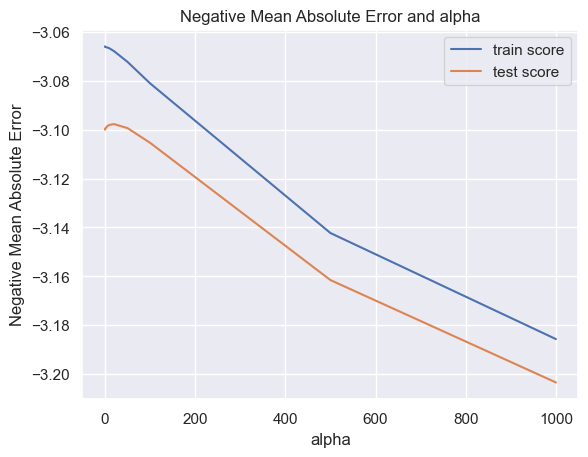

In [146]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('alpha')

plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")

plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [147]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [148]:
# check the coefficient values with lambda = 3.0

alpha = 20

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

ridge.coef_

array([ 1.09269692e-06,  1.08347573e-01,  4.27450679e-01,  3.94182480e-02,
        1.37024342e-01,  1.65812282e-06,  2.76972449e-01,  4.07638463e-04,
       -1.26218604e-01, -4.42297772e-05, -5.07457094e-01, -5.35064312e-02,
        1.06120858e+00,  8.73005346e-02, -1.10224411e-06,  1.79110890e-01,
       -2.39562023e-01,  2.35166901e-01, -6.78688157e-02,  2.81546595e-01,
        9.30803584e-01,  2.12538855e+00, -2.89049297e-01, -3.03629019e-01,
       -7.89703508e-01,  5.87571930e-01, -3.84231474e-01, -9.51719241e-01,
       -2.69843777e-02,  5.06909765e-01,  4.55922354e-01,  2.56466291e-01,
       -1.90463696e-01,  3.45355831e-01,  1.16628148e+00, -7.52221630e-01,
       -1.98645550e+00, -2.58772457e+00])

In [149]:
# Check the mean squared error

metrics.mean_squared_error(y_test, ridge.predict(X_test))

14.932715165053388

In [150]:
metrics.r2_score(y_test, ridge.predict(X_test))

0.3891373929135423

In [151]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})

ridge_df.reset_index(drop=True, inplace=True)

ridge_df

Features  Coefficient
0                  annual_income       0.0000
1                 debt_to_income       0.1083
2                      delinq_2y       0.4275
3           earliest_credit_line       0.0394
4             inquiries_last_12m       0.1370
5          total_credit_utilized       0.0000
6       num_collections_last_12m       0.2770
7   total_collection_amount_ever       0.0004
8      num_accounts_30d_past_due      -0.1262
9              total_debit_limit      -0.0000
10             num_mort_accounts      -0.5075
11  account_never_delinq_percent      -0.0535
12                     tax_liens       1.0612
13        public_record_bankrupt       0.0873
14                   loan_amount      -0.0000
15                          term       0.1791
16                    mid-senior      -0.2396
17                       missing       0.2352
18                        senior      -0.0679
19                           OWN       0.2815
20               Source Verified       0.9308
21                      Verified       2.1254
22                         17-24      -0.2890
23                          9-16      -0.3036
24                       missing      -0.7897
25            debt_consolidation       0.5876
26              home_improvement      -0.3842
27                         house      -0.9517
28                major_purchase      -0.0270
29                       medical       0.5069
30                        moving       0.4559
31                         other       0.2565
32              renewable_energy      -0.1905
33                small_business       0.3454
34                      vacation       1.1663
35                         joint      -0.7522
36                         whole      -1.9865
37                     DirectPay      -2.5877

In [152]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

ridge_coeff_dict

{'annual_income': 0.0,
 'debt_to_income': 0.1083,
 'delinq_2y': 0.4275,
 'earliest_credit_line': 0.0394,
 'inquiries_last_12m': 0.137,
 'total_credit_utilized': 0.0,
 'num_collections_last_12m': 0.277,
 'total_collection_amount_ever': 0.0004,
 'num_accounts_30d_past_due': -0.1262,
 'total_debit_limit': -0.0,
 'num_mort_accounts': -0.5075,
 'account_never_delinq_percent': -0.0535,
 'tax_liens': 1.0612,
 'public_record_bankrupt': 0.0873,
 'loan_amount': -0.0,
 'term': 0.1791,
 'mid-senior': -0.2396,
 'missing': missing    0.2352
 missing   -0.7897
 dtype: float64,
 'senior': -0.0679,
 'OWN': 0.2815,
 'Source Verified': 0.9308,
 'Verified': 2.1254,
 '17-24': -0.289,
 '9-16': -0.3036,
 'debt_consolidation': 0.5876,
 'home_improvement': -0.3842,
 'house': -0.9517,
 'major_purchase': -0.027,
 'medical': 0.5069,
 'moving': 0.4559,
 'other': 0.2565,
 'renewable_energy': -0.1905,
 'small_business': 0.3454,
 'vacation': 1.1663,
 'joint': -0.7522,
 'whole': -1.9865,
 'DirectPay': -2.5877}

In [153]:
print(f'Ridge Train R2 score: {round(metrics.r2_score(y_train, ridge.predict(X_train)),2)}')

print(f'Ridge Test R2 score : {round(metrics.r2_score(y_test, ridge.predict(X_test)),2)}')

Ridge Train R2 score: 0.39
Ridge Test R2 score : 0.39


In [154]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [155]:
lambdas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01] # Higher the value of lambda,

for i in lambdas:
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_train,y_train)

    y_pred = lassoreg.predict(X_train)
    
    print('Lambdas: ',i)
    print(r2_score(y_train,y_pred))
        
    y_predt = lassoreg.predict(X_test)
    
    print(r2_score(y_test,y_predt))
    print(lassoreg.coef_,'\n')

Lambdas:  0.0001
0.3872865238950757
0.38848872282862357
[ 9.75337893e-07  1.08238435e-01  4.25729416e-01  3.91751661e-02
  1.32789279e-01  1.61467440e-06  3.52554648e-01  4.10881962e-04
 -2.22238492e+00 -4.38715043e-05 -5.05717215e-01 -5.33277087e-02
  1.42584370e+00  9.36923251e-02 -8.40965857e-07  1.79532973e-01
 -2.48020254e-01  2.27572412e-01 -7.96438481e-02  2.95546598e-01
  9.78710369e-01  2.19901962e+00 -3.06477494e-01 -3.26144865e-01
 -8.30465466e-01  6.02212524e-01 -4.10620763e-01 -1.26229871e+00
 -3.48976560e-02  6.44306779e-01  7.09811534e-01  2.67277303e-01
 -6.59203632e-01  4.29472369e-01  1.94199929e+00 -7.98644012e-01
 -2.03266654e+00 -2.75008063e+00] 

Lambdas:  0.0002
0.3872790641302617
0.3885078861239639
[ 9.76429359e-07  1.08215524e-01  4.25241674e-01  3.91921832e-02
  1.33004645e-01  1.61406531e-06  3.46436934e-01  4.10809083e-04
 -1.74304155e+00 -4.38745319e-05 -5.05772159e-01 -5.33354091e-02
  1.41792848e+00  9.25880156e-02 -8.52393614e-07  1.79512622e-01
 -2.4685

In [156]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
7        0.003         -3.067035        -3.098031                1
9        0.005         -3.068290        -3.098033                2
8        0.004         -3.067615        -3.098041                3
6        0.002         -3.066618        -3.098169                4
5        0.001         -3.066367        -3.098776                5
10        0.01         -3.072939        -3.099156                6
4       0.0005         -3.066201        -3.099341                7
3       0.0004         -3.066136        -3.099456                8
2       0.0003         -3.066072        -3.099572                9
1       0.0002         -3.066020        -3.099691               10
0       0.0001         -3.065973        -3.099842               11

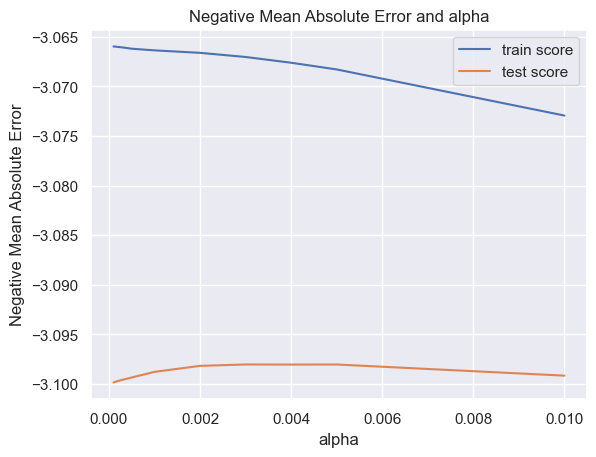

In [157]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('alpha')

plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [158]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.003)

In [159]:
# check the coefficient values with lambda = 0.005

alpha = 0.003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.04066234e-06,  1.07871446e-01,  4.20969490e-01,  3.89183580e-02,
        1.38703548e-01,  1.63863755e-06,  1.68690293e-01,  4.11216172e-04,
       -0.00000000e+00, -4.40736098e-05, -5.07191682e-01, -5.34245707e-02,
        1.19078396e+00,  6.29137338e-02, -1.45581727e-06,  1.79327981e-01,
       -2.22032913e-01,  2.05666510e-01, -6.03186311e-02,  2.63473527e-01,
        9.57610743e-01,  2.17976643e+00, -2.59076617e-01, -2.84651842e-01,
       -7.77549639e-01,  5.66350315e-01, -3.88238917e-01, -1.06551947e+00,
       -0.00000000e+00,  4.18128824e-01,  2.46371272e-01,  2.02879616e-01,
       -0.00000000e+00,  2.00256621e-01,  1.44531819e+00, -7.61300674e-01,
       -2.01995521e+00, -2.71575549e+00])

In [160]:
# Check the mean squared error

metrics.mean_squared_error(y_test, lasso.predict(X_test))

14.945955144968416

In [161]:
metrics.r2_score(y_test, lasso.predict(X_test))

0.3885957761640584

In [162]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})

lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]

lasso_df.reset_index(drop=True, inplace=True)

lasso_df

Features  Coefficient
0                 debt_to_income       0.1079
1                      delinq_2y       0.4210
2           earliest_credit_line       0.0389
3             inquiries_last_12m       0.1387
4       num_collections_last_12m       0.1687
5   total_collection_amount_ever       0.0004
6              num_mort_accounts      -0.5072
7   account_never_delinq_percent      -0.0534
8                      tax_liens       1.1908
9         public_record_bankrupt       0.0629
10                          term       0.1793
11                    mid-senior      -0.2220
12                       missing       0.2057
13                        senior      -0.0603
14                           OWN       0.2635
15               Source Verified       0.9576
16                      Verified       2.1798
17                         17-24      -0.2591
18                          9-16      -0.2847
19                       missing      -0.7775
20            debt_consolidation       0.5664
21              home_improvement      -0.3882
22                         house      -1.0655
23                       medical       0.4181
24                        moving       0.2464
25                         other       0.2029
26                small_business       0.2003
27                      vacation       1.4453
28                         joint      -0.7613
29                         whole      -2.0200
30                     DirectPay      -2.7158

In [163]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

lasso_coeff_dict

{'annual_income': 1.04066233622836e-06,
 'debt_to_income': 0.10787144600998748,
 'delinq_2y': 0.4209694903424153,
 'earliest_credit_line': 0.03891835804745858,
 'inquiries_last_12m': 0.13870354844580088,
 'total_credit_utilized': 1.6386375542206133e-06,
 'num_collections_last_12m': 0.16869029255878187,
 'total_collection_amount_ever': 0.00041121617235687807,
 'num_accounts_30d_past_due': -0.0,
 'total_debit_limit': -4.4073609770815665e-05,
 'num_mort_accounts': -0.5071916821175094,
 'account_never_delinq_percent': -0.053424570746122564,
 'tax_liens': 1.1907839581737927,
 'public_record_bankrupt': 0.06291373381887867,
 'loan_amount': -1.4558172663371802e-06,
 'term': 0.17932798079018633,
 'mid-senior': -0.22203291330538263,
 'missing': missing    0.205667
 missing   -0.777550
 dtype: float64,
 'senior': -0.0603186311109801,
 'OWN': 0.26347352729749757,
 'Source Verified': 0.9576107430808345,
 'Verified': 2.1797664290741077,
 '17-24': -0.25907661665655746,
 '9-16': -0.28465184186311615,


In [164]:
print(f'Lasso Train R2 score: {round(metrics.r2_score(y_train, lasso.predict(X_train)),2)}')
print(f'Lasso Test R2 score : {round(metrics.r2_score(y_test, lasso.predict(X_test)),2)}')

Lasso Train R2 score: 0.39
Lasso Test R2 score : 0.39


In [165]:
X_train.head()

annual_income  debt_to_income  delinq_2y  earliest_credit_line  \
2609       168000.0           13.40          0                  2008   
6374        55000.0           19.05          0                  2007   
4067        65000.0            2.66          0                  1973   
689        137000.0            1.96          0                  2012   
3049        95000.0           26.84          0                  1971   

      inquiries_last_12m  total_credit_utilized  num_collections_last_12m  \
2609                   6                  65530                         0   
6374                   1                  35053                         0   
4067                   2                   6471                         0   
689                    3                   7172                         0   
3049                   6                  43563                         0   

      total_collection_amount_ever  num_accounts_30d_past_due  \
2609                             0                          0   
6374                             0                          0   
4067                             0                          0   
689                              0                          0   
3049                             0                          0   

      total_debit_limit  num_mort_accounts  account_never_delinq_percent  \
2609              60700                  0                          95.7   
6374              15700                  2                         100.0   
4067              41200                  3                          96.4   
689              183300                  0                         100.0   
3049              35000                  0                         100.0   

      tax_liens  public_record_bankrupt  loan_amount  term  mid-senior  \
2609          0                       0        12000    36           1   
6374          0                       0         9000    36           0   
4067          0                       0        24000    60           0   
689           0                       0         4000    36           0   
3049          0                       1        20000    60           0   

      missing  senior  OWN  Source Verified  Verified  17-24  9-16  missing  \
2609        0       0    0                0         1      0     0        0   
6374        0       0    0                0         0      0     0        0   
4067        0       0    0                0         0      0     0        0   
689         0       0    0                0         0      0     0        0   
3049        0       0    0                0         0      0     0        0   

      debt_consolidation  home_improvement  house  major_purchase  medical  \
2609                   0                 0      0               0        0   
6374                   0                 0      0               0        0   
4067                   0                 1      0               0        0   
689                    1                 0      0               0        0   
3049                   1                 0      0               0        0   

      moving  other  renewable_energy  small_business  vacation  joint  whole  \
2609       0      0                 0               0         0      0      1   
6374       0      0                 0               0         0      0      1   
4067       0      0                 0               0         0      0      1   
689        0      0                 0               0         0      0      1   
3049       0      0                 0               0         0      0      1   

      DirectPay  
2609          1  
6374          1  
4067          0  
689           0  
3049          0

In [166]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10,
                           random_state= 0)

In [167]:
Dec_tree = DT.fit(X_train, y_train)
Dec_tree

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5,
                      random_state=0)

In [168]:
y_train_pred_DT= Dec_tree.predict(X_train)

print('r2_score on training data =', metrics.r2_score(y_true=y_train,
                                                      y_pred=y_train_pred_DT))

r2_score on training data = 0.2647955444743083


In [169]:
y_test_pred_DT = Dec_tree.predict(X_test)

print('r2_score on test data =', metrics.r2_score(y_true=y_test,
                                                  y_pred=y_test_pred_DT))

r2_score on test data = 0.25176492717021126


In [170]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion" : ['mse'],
              "min_samples_split": [ 3, 10, 20],
              "max_depth": [2, 3, 4, 5],
              "min_samples_leaf": [10, 20, 40],
              "max_leaf_nodes": [5, 20],
              }


grid_cv_Dec_tree = GridSearchCV(Dec_tree, param_grid, cv=5, n_jobs = -1, verbose = 1)

%time

grid_cv_Dec_tree.fit(X_train,y_train)

Wall time: 0 ns
Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [5, 20],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [3, 10, 20]},
             verbose=1)

In [171]:
print("R-Squared::{}".format(grid_cv_Dec_tree.best_score_))

print("Best Hyperparameters::\n{}".format(grid_cv_Dec_tree.best_params_))

R-Squared::0.254725112074635
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [172]:
param_grid = {"criterion": ["mse"],
              "min_samples_split": [25],
              "max_depth": [5],
              "min_samples_leaf": [10],
              "max_leaf_nodes": [100],
              }

grid_cv_Dec_tree = GridSearchCV(Dec_tree, param_grid, cv=5)

grid_cv_Dec_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             param_grid={'criterion': ['mse'], 'max_depth': [5],
                         'max_leaf_nodes': [100], 'min_samples_leaf': [10],
                         'min_samples_split': [25]})

In [173]:
from sklearn.model_selection import cross_val_score

r2_scores_DT_train = cross_val_score(grid_cv_Dec_tree.best_estimator_, 
                                     X_train, 
                                     y_train, 
                                     cv=10)

mse_scores = cross_val_score(grid_cv_Dec_tree.best_estimator_, 
                             X_train, 
                             y_train, 
                             cv=10,
                             scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores_DT_train)))

print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.264
MSE::-18.691


In [174]:
best_dtm_model = grid_cv_Dec_tree.best_estimator_

y_test_pred_DT = best_dtm_model.predict(X_test)

r2_score_DT_test = best_dtm_model.score(X_test,y_test_pred_DT)
print("R-squared:{:.3f}".format(r2_score_DT_test))
print("MSE: %.2f" % metrics.mean_squared_error(y_test_pred_DT, y_test_pred_DT))

R-squared:1.000
MSE: 0.00


In [175]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
rf = RandomForestRegressor(random_state = 42, 
                           max_depth = 5, 
                           n_jobs = -1, 
                           min_samples_leaf = 10)

In [177]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [178]:
sample_tree = rf.estimators_[1]

In [179]:
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

In [180]:
rf.feature_importances_

array([9.15951250e-03, 1.38484546e-01, 2.44267228e-03, 7.83785110e-03,
       1.30405100e-02, 7.80642155e-03, 0.00000000e+00, 1.14175249e-03,
       0.00000000e+00, 2.71033509e-01, 3.36672923e-02, 1.89865131e-02,
       0.00000000e+00, 3.02198799e-04, 1.30968718e-02, 3.38905676e-01,
       2.67473356e-04, 0.00000000e+00, 3.35375024e-04, 4.01369587e-04,
       4.11304832e-04, 3.76279370e-02, 6.13851544e-05, 4.34985320e-04,
       9.16022145e-04, 1.56239680e-03, 6.36460940e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.23048740e-03,
       8.50777675e-02, 1.27045226e-02])

In [181]:
Imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp' : rf.feature_importances_
})
Imp_df

Varname       Imp
0                  annual_income  0.009160
1                 debt_to_income  0.138485
2                      delinq_2y  0.002443
3           earliest_credit_line  0.007838
4             inquiries_last_12m  0.013041
5          total_credit_utilized  0.007806
6       num_collections_last_12m  0.000000
7   total_collection_amount_ever  0.001142
8      num_accounts_30d_past_due  0.000000
9              total_debit_limit  0.271034
10             num_mort_accounts  0.033667
11  account_never_delinq_percent  0.018987
12                     tax_liens  0.000000
13        public_record_bankrupt  0.000302
14                   loan_amount  0.013097
15                          term  0.338906
16                    mid-senior  0.000267
17                       missing  0.000000
18                        senior  0.000335
19                           OWN  0.000401
20               Source Verified  0.000411
21                      Verified  0.037628
22                         17-24  0.000061
23                          9-16  0.000435
24                       missing  0.000916
25            debt_consolidation  0.001562
26              home_improvement  0.000064
27                         house  0.000000
28                major_purchase  0.000000
29                       medical  0.000000
30                        moving  0.000000
31                         other  0.000000
32              renewable_energy  0.000000
33                small_business  0.000000
34                      vacation  0.000000
35                         joint  0.004230
36                         whole  0.085078
37                     DirectPay  0.012705

In [182]:
Imp_df.sort_values(by = 'Imp', ascending = False)

Varname       Imp
15                          term  0.338906
9              total_debit_limit  0.271034
1                 debt_to_income  0.138485
36                         whole  0.085078
21                      Verified  0.037628
10             num_mort_accounts  0.033667
11  account_never_delinq_percent  0.018987
14                   loan_amount  0.013097
4             inquiries_last_12m  0.013041
37                     DirectPay  0.012705
0                  annual_income  0.009160
3           earliest_credit_line  0.007838
5          total_credit_utilized  0.007806
35                         joint  0.004230
2                      delinq_2y  0.002443
25            debt_consolidation  0.001562
7   total_collection_amount_ever  0.001142
24                       missing  0.000916
23                          9-16  0.000435
20               Source Verified  0.000411
19                           OWN  0.000401
18                        senior  0.000335
13        public_record_bankrupt  0.000302
16                    mid-senior  0.000267
26              home_improvement  0.000064
22                         17-24  0.000061
31                         other  0.000000
6       num_collections_last_12m  0.000000
34                      vacation  0.000000
33                small_business  0.000000
32              renewable_energy  0.000000
29                       medical  0.000000
30                        moving  0.000000
28                major_purchase  0.000000
27                         house  0.000000
12                     tax_liens  0.000000
17                       missing  0.000000
8      num_accounts_30d_past_due  0.000000

In [183]:
print(f'DT Train R2 Score: {round(r2_score(y_train, y_train_pred),2)}')

print(f'DT Test R2 Score: {round(r2_score(y_test, y_test_pred),2)}')

DT Train R2 Score: 0.38
DT Test R2 Score: 0.34


In [184]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [187]:
from sklearn.model_selection import RandomizedSearchCV

# instantiating random forest regressor
rf2 = RandomForestRegressor()

#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators':[5,10,20,40,80],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10],
          'oob_score': [True]}

RCV = RandomizedSearchCV(estimator = rf2, 
                         param_distributions = params, 
                         n_iter = 5, 
                         scoring = 'r2', 
                         cv = 10, 
                         verbose=5, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10],
                                        'min_samples_leaf': [2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [188]:
# Best parameters

RCV.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'mae'}

In [189]:
# Best estimator

RCV.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [190]:
# Best score

RCV.best_score_

0.3406156846965832

In [191]:
# Building randomforest regressor with the best estimator 

rf1 = RCV.best_estimator_

# Fitting

rf1.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [196]:
# Predictions on train data
y_pred_train = rf1.predict(X_train)

In [197]:
# Predictions on test data
y_pred_test = rf1.predict(X_test)

In [199]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of test data is ',adjusted_r2_score(X_test,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.6154412005086743
Adj. R2 score of train data is  0.6123346455808107
rmse score of train data is  3.135567905262199

R2 score of test data is  0.3796867164417458
Adj. R2 score of test data is  0.364410044520026
rmse score of test data is  3.894064678022066


In [200]:
test_result = pd.Series(rf1.predict(data_test), name = "interest_rate").astype(int)
data_test = pd.read_csv("loans_test_data.csv")
results = pd.concat([data_test["id"], test_result],axis = 1)

results.to_csv("hackathon.csv", index = False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
